In [1]:
import silq
silq.initialize("EWJN", mode='analysis')
%matplotlib notebook

Initializing imports


<IPython.core.display.Javascript object>

Initializing functions
Initializing data
Initializing analysis
Initializing plotting
Initialization complete


# Measurement 10
Redoing first coulomb peak (for plunge voltage scan)

For a detailed scan of the plunge voltage versus T1 time/contrast, I am going back to the first coulomb peak.
The reason is that this one had a T1 time of ~1s, significantly lower than the others.
This results in a faster measurement, and also allows checking if the T1 time changes with voltage.

As we can see below, we still get a very good contrast, and the T1 time is relatively stable

<IPython.core.display.Javascript object>


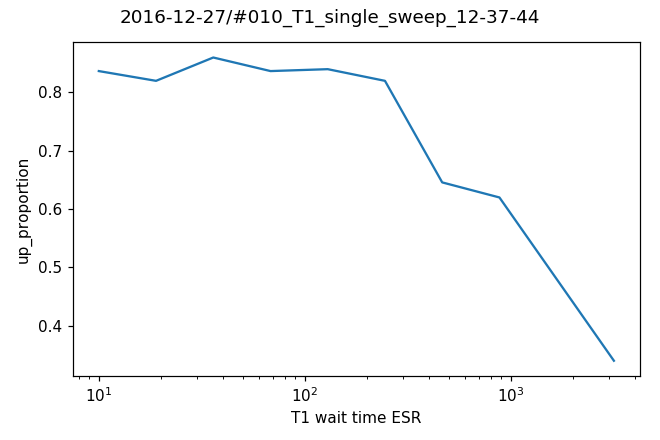

In [2]:
data = qc.load_data('2016-12-27/#010_T1_single_sweep_12-37-44')
plot = qc.MatPlot(data.up_proportion)
plot[0].set_xscale('log')

<IPython.core.display.Javascript object>


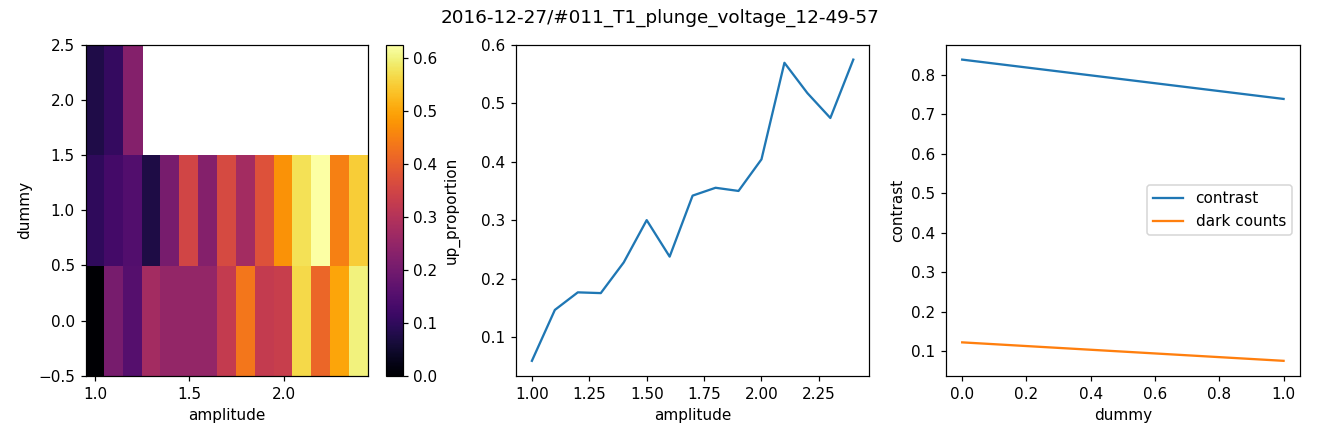

In [7]:
data = qc.load_data('2016-12-27/#011_T1_plunge_voltage_12-49-57')
plot = qc.MatPlot(subplots=3)
plot.add(data.up_proportion, subplot=0)
plot.add(np.nanmean(data.up_proportion, 0), x=data.amplitude_set[0], subplot=1)
plot[1].set_xlabel('amplitude')
plot.add(data.contrast, subplot=2, label='contrast')
plot.add(data.dark_counts_2, subplot=2, label='dark counts')
plot[2].legend()

<IPython.core.display.Javascript object>


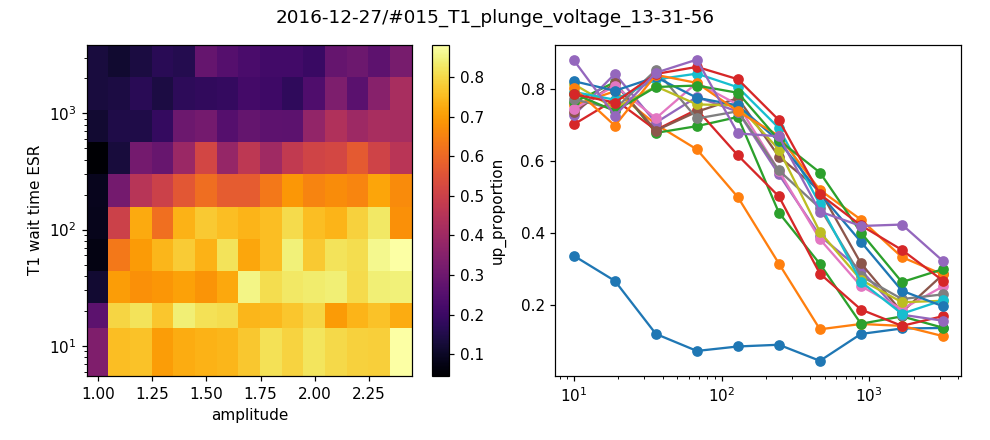

In [4]:
data = qc.load_data('2016-12-27/#015_T1_plunge_voltage_13-31-56')
plot = qc.MatPlot(subplots=2)
plot.add(data.up_proportion, subplot=0)
plot[1].plot(data.T1_wait_time_ESR_set, data.up_proportion, 'o-')
plot.subplots[0].set_yscale('log')
plot.subplots[1].set_xscale('log')

Next I attempted to do a detailed T1 scan for different plunge voltages, but unfortunately the system went out of tune pretty soon.

<IPython.core.display.Javascript object>


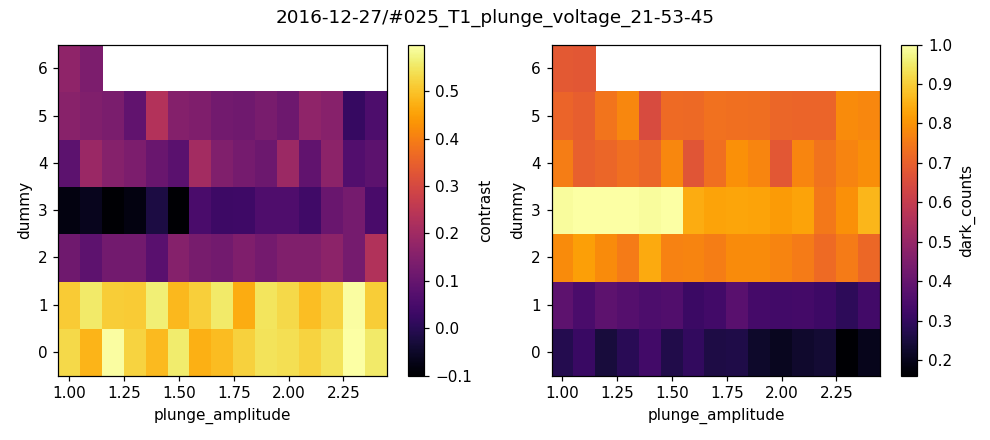

In [3]:
data = qc.load_data('2016-12-27/#025_T1_plunge_voltage_21-53-45')
plot = qc.MatPlot(subplots=2)
plot.add(data.contrast, subplot=0)
plot.add(data.dark_counts, subplot=1)

Below we perform a plunge voltage scan, and measure the contrast and dark counts.
For the dark counts, we also add a 20 ms plunge between the initialization and read.

We see that both the contrast and dark counts are quite insensitive to plunge voltage.
This has a few implications:
- Plunging does not affect the up proportion.
- Performing operations on the qubit while plunged is relatively insensitive to the plunge voltage.

<IPython.core.display.Javascript object>


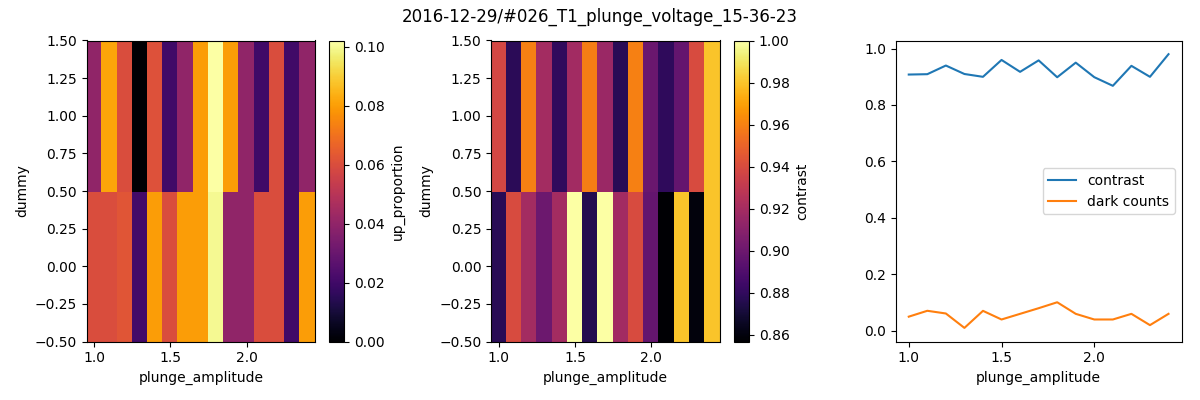

In [10]:
data = qc.load_data('2016-12-29/#026_T1_plunge_voltage_15-36-23')
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot.add(data.up_proportion, subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(np.nanmean(data.contrast, 0), x=data.plunge_amplitude_set[0], subplot=2, label='contrast')
plot.add(np.nanmean(data.up_proportion, 0), x=data.plunge_amplitude_set[0], subplot=2, label='dark counts')
plot[2].set_xlabel('plunge_amplitude')
plot[2].legend()
plot.tight_layout()

Here I tried doing a scan of different T1 times for different plunge amplitudes.
Unfortunately the contrast shifted quite early on

<IPython.core.display.Javascript object>


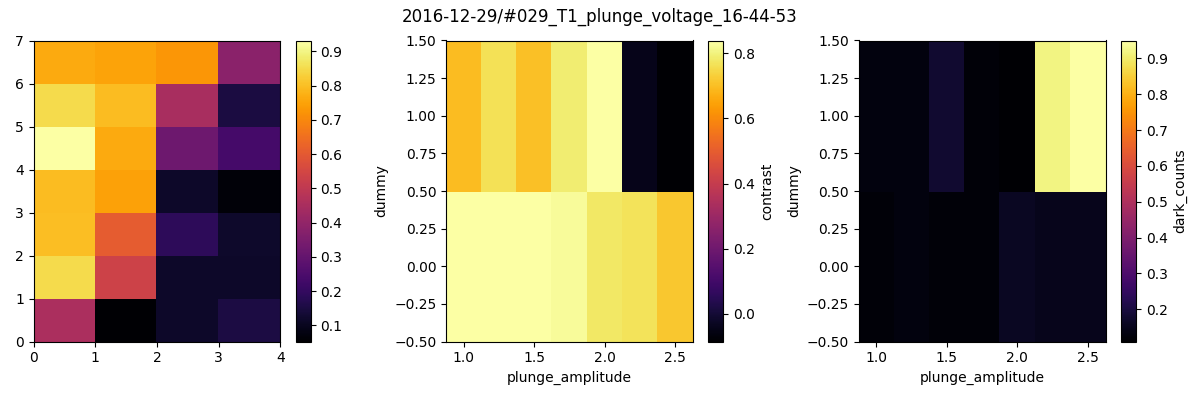

In [11]:
data = qc.load_data('2016-12-29/#029_T1_plunge_voltage_16-44-53')
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(np.nanmean(data.up_proportion_0_0_0, 0),subplot=0)
plot.traces[0]['config']['y'] = data.plunge_amplitude_set[0]
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts, subplot=2)

<IPython.core.display.Javascript object>


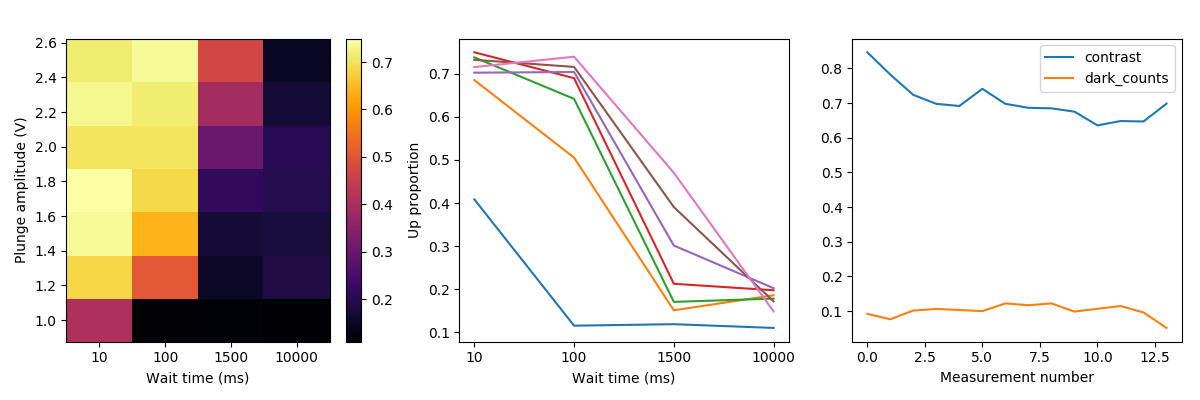

In [55]:
data = qc.load_data('2016-12-29/#051_T1_plunge_voltage_22-47-37')
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
# plot.add(data.up_proportion, subplot=1)
plot.add(np.nanmean(data.up_proportion_0_0_0, 0),
         x=np.array([0.5, 1.5, 2.5, 3.5], dtype=float),
         y=data.plunge_amplitude_set[0], subplot=0)
plot[0].set_xticks([0.5, 1.5, 2.5, 3.5])
plot[0].set_xticklabels([10, 100, 1500, 10000])
plot[0].set_xlabel('Wait time (ms)')
plot[0].set_ylabel('Plunge amplitude (V)')

plot[1].plot(np.nanmean(data.up_proportion_0_0_0, 0).transpose())
plot[1].set_xticks(range(4))
plot[1].set_xticklabels([10, 100, 1500, 10000])
plot[1].set_xlabel('Wait time (ms)')
plot[1].set_ylabel('Up proportion')

plot.add(np.nanmean(data.contrast[:14], 1), subplot=2, label='contrast')
plot.add(np.nanmean(data.up_proportion_2_0[:14], 1), subplot=2, label='dark_counts')
plot[2].set_xlabel('Measurement number')
plot[2].legend()

Slightly more detailed scan at fixed tau=1.5s

<IPython.core.display.Javascript object>


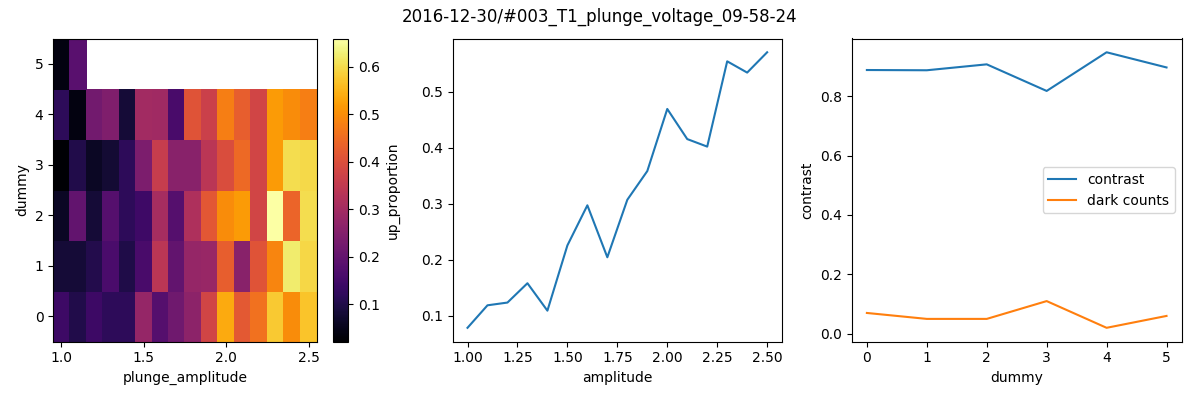

In [2]:
data = qc.load_data('2016-12-30/#003_T1_plunge_voltage_09-58-24')
plot = qc.MatPlot(subplots=3)
plot.add(data.up_proportion, subplot=0)
plot.add(np.nanmean(data.up_proportion, 0), x=data.plunge_amplitude_set[0], subplot=1)
plot[1].set_xlabel('amplitude')
plot.add(data.contrast, subplot=2, label='contrast')
plot.add(data.dark_counts, subplot=2, label='dark counts')
plot[2].legend()

# Measurement 9
Redoing third coulomb peak (msmt 6+7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


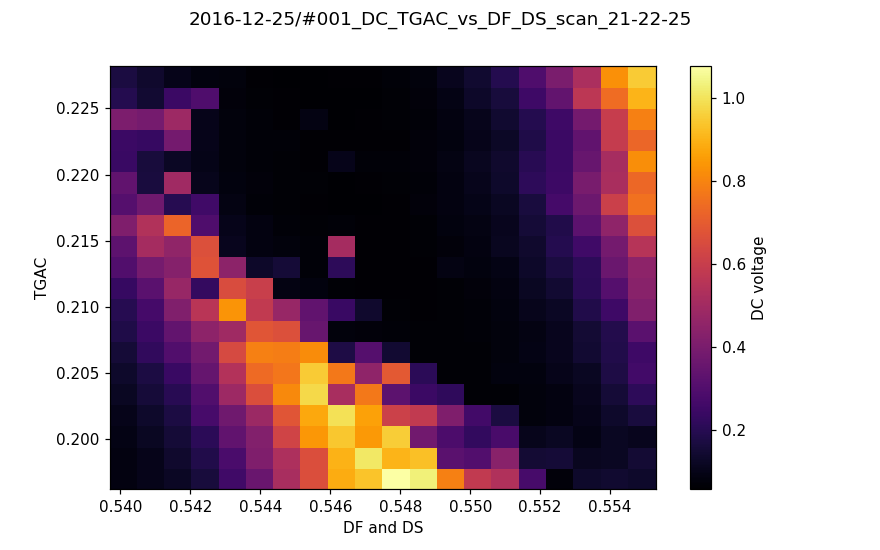

In [3]:
data = qc.load_data('2016-12-25/#001_DC_TGAC_vs_DF_DS_scan_21-22-25')
qc.MatPlot(data.DC_voltage)

Performed T1 measurement, and it again shows a very low contrast.
It is interesting to note that the contrast is significantly higher than the T1 amplitude, although they should be equal.
What's even more interesting is that the dark counts obtained from performing a steered initialization followed by a read (no plunging) shows a much lower dark counts level. This suggests that the plunge itself influences the dark counts.

Number of successful sweeps: 21


<IPython.core.display.Javascript object>


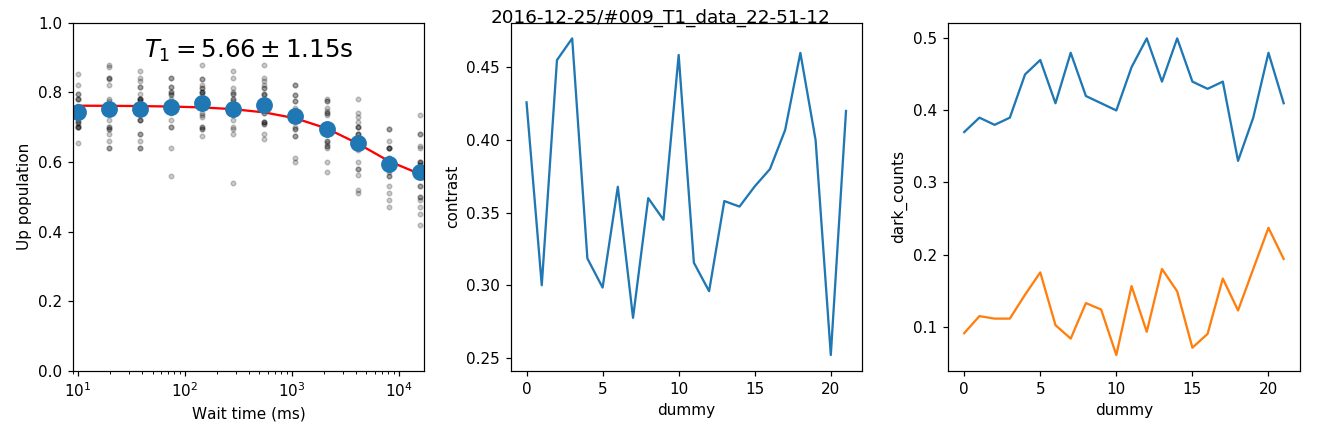

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 37
    # data points      = 12
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -103.895
    Bayesian info crit = -102.440
[[Variables]]
    tau:         5658.18595 +/- 1.15e+03 (20.37%) (init= 15848.9)
    amplitude:   0.20933429 +/- 0.017315 (8.27%) (init= 0.1997166)
    offset:      0.55228676 +/- 0.017814 (3.23%) (init= 0.5701709)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.964 
    C(tau, offset)               = -0.864 
    C(tau, amplitude)            =  0.775 



In [4]:
T1_msmt = T1_Analysis(location='2016-12-25/#009_T1_data_22-51-12')
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))

T1_msmt.plot_T1(ax=plot[0])
plot.add(T1_msmt.dataset.contrast, subplot=1)
plot.add(T1_msmt.dataset.dark_counts_0_1, subplot=2)
plot.add(T1_msmt.dataset.dark_counts_1, subplot=2)
print(T1_msmt.fit_result.fit_report())
plt.tight_layout()

I decided to find out why the contrast in the T1 is so low. 
I found out that in the previous measurement of measuring a fixed tau for varying plunge voltages, there was a bug in the code.
I was varying `plunge_pulse.voltage`, while it should have been `plunge_pulse.amplitude`.
As a result, nothing was actually being varied.
Below is a scan for fixed tau = 5s, with 40 samples per point.
Here we can clearly see that

<IPython.core.display.Javascript object>


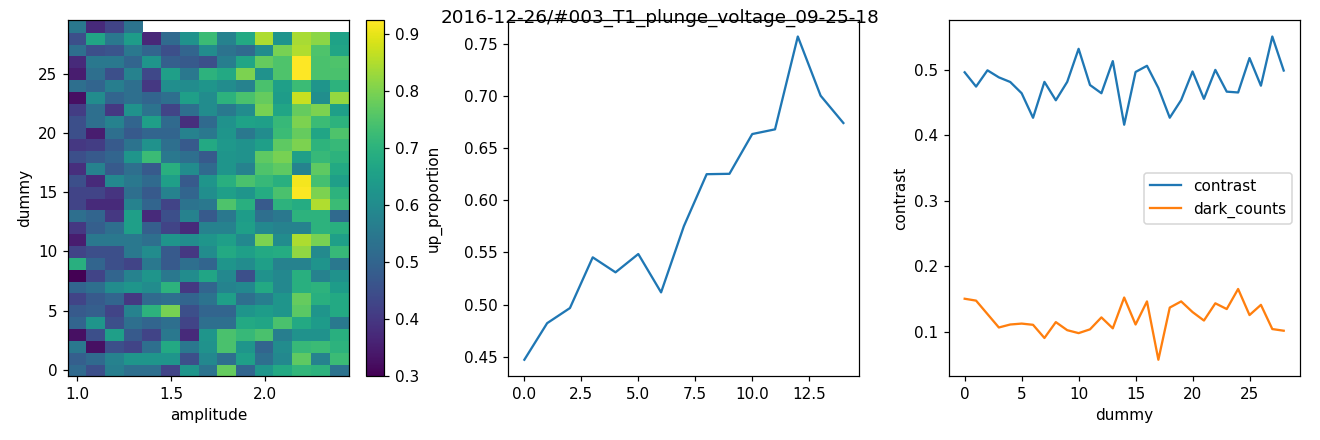

In [5]:
data = qc.load_data('2016-12-26/#003_T1_plunge_voltage_09-25-18')
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
plot.add(data.up_proportion, subplot=0)
plot.add(np.nanmean(data.up_proportion, 0), subplot=1)
plot.add(data.contrast, subplot=2, label='contrast')
plot.add(data.dark_counts_2, subplot=2, label='dark_counts')
plot[2].legend()
plt.tight_layout()

# Measurement 8
Fourth coulomb peak, two left of measurement 4

<IPython.core.display.Javascript object>


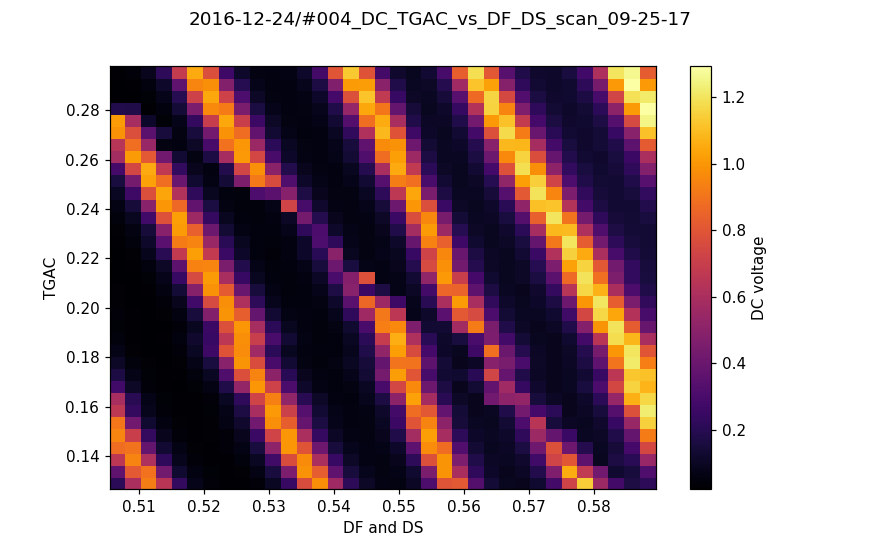

In [5]:
data = qc.load_data('2016-12-24/#004_DC_TGAC_vs_DF_DS_scan_09-25-17')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


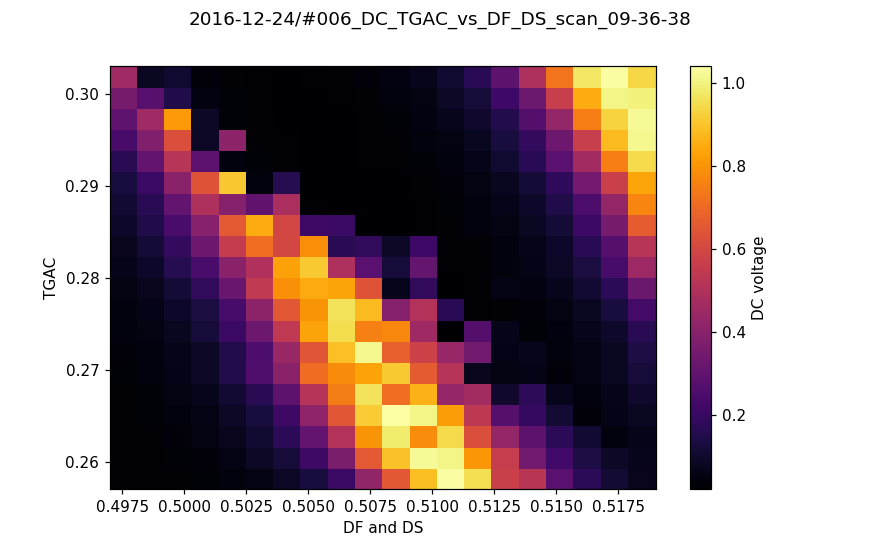

In [6]:
data = qc.load_data('2016-12-24/#006_DC_TGAC_vs_DF_DS_scan_09-36-38')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


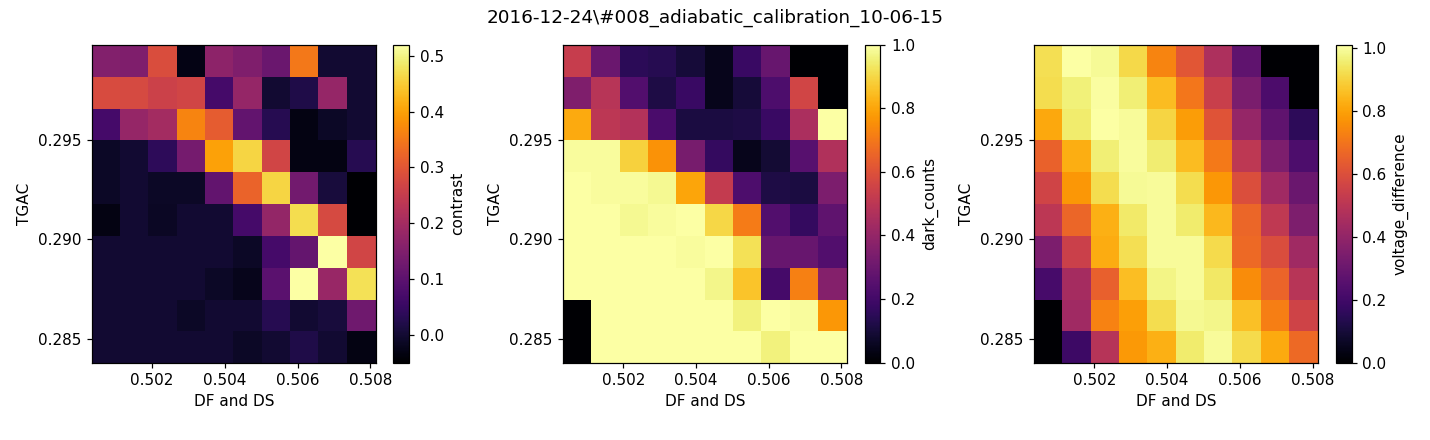

In [7]:
data = qc.load_data('2016-12-24\#008_adiabatic_calibration_10-06-15')
plot = CalibrationPlot(data)

<IPython.core.display.Javascript object>


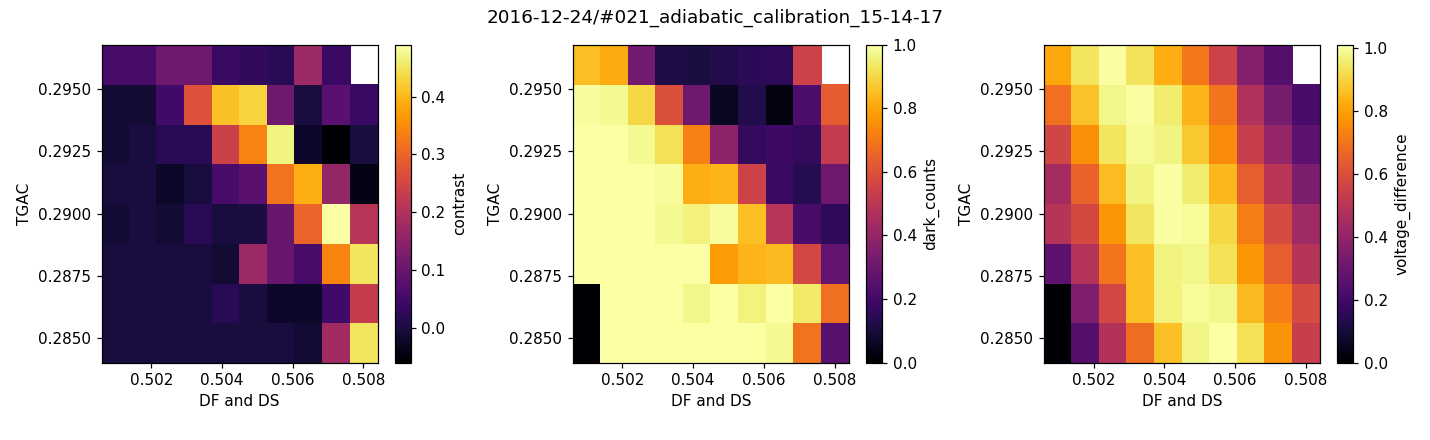

In [8]:
data = qc.load_data('2016-12-24/#021_adiabatic_calibration_15-14-17')
plot = CalibrationPlot(data)

Number of successful sweeps: 1


<IPython.core.display.Javascript object>


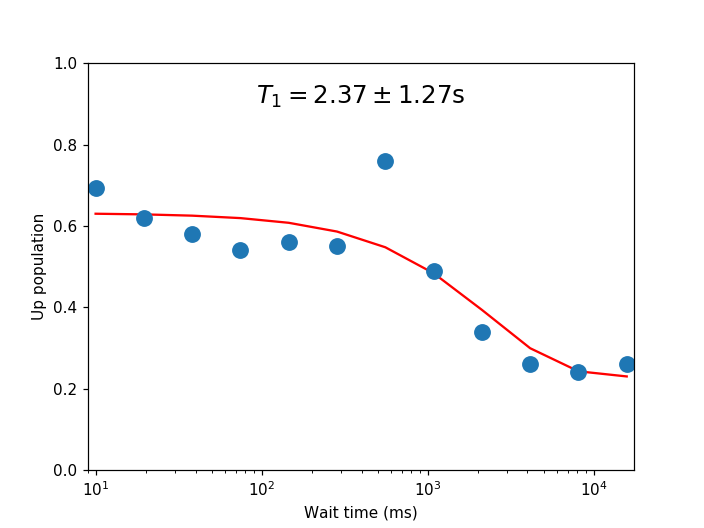

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 47
    # data points      = 12
    # variables        = 3
    chi-square         = 0.066
    reduced chi-square = 0.007
    Akaike info crit   = -56.347
    Bayesian info crit = -54.892
[[Variables]]
    tau:         2371.89178 +/- 1.27e+03 (53.68%) (init= 4151.28)
    amplitude:   0.40240821 +/- 0.071988 (17.89%) (init= 0.52)
    offset:      0.22942159 +/- 0.067317 (29.34%) (init= 0.24)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.855 
    C(tau, offset)               = -0.676 
    C(tau, amplitude)            =  0.400 



In [9]:
T1_msmt = T1_Analysis(location='2016-12-24/#024_T1_data_15-37-51')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

I realized a significant reason for the lower contrast is that the ESR frequency shifted.

<IPython.core.display.Javascript object>


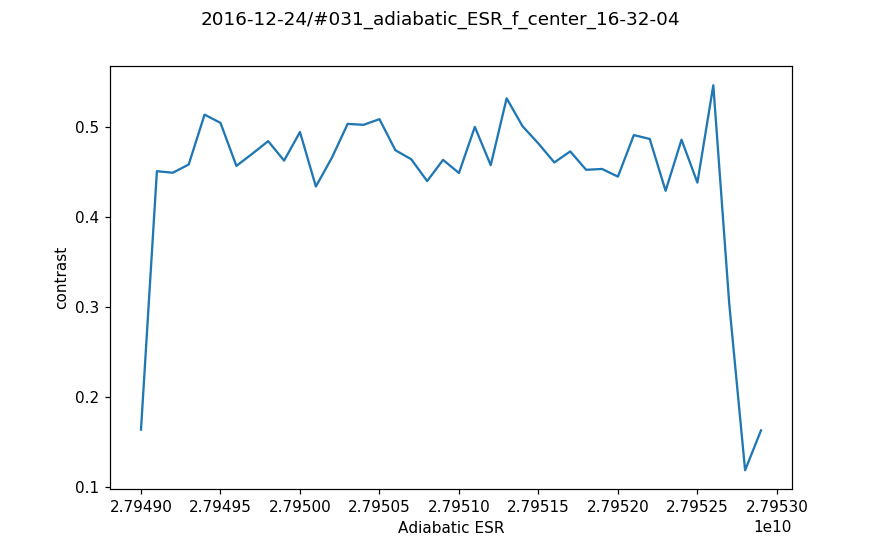

In [10]:
data = qc.load_data('2016-12-24/#031_adiabatic_ESR_f_center_16-32-04')
plot = qc.MatPlot(data.contrast)

<IPython.core.display.Javascript object>


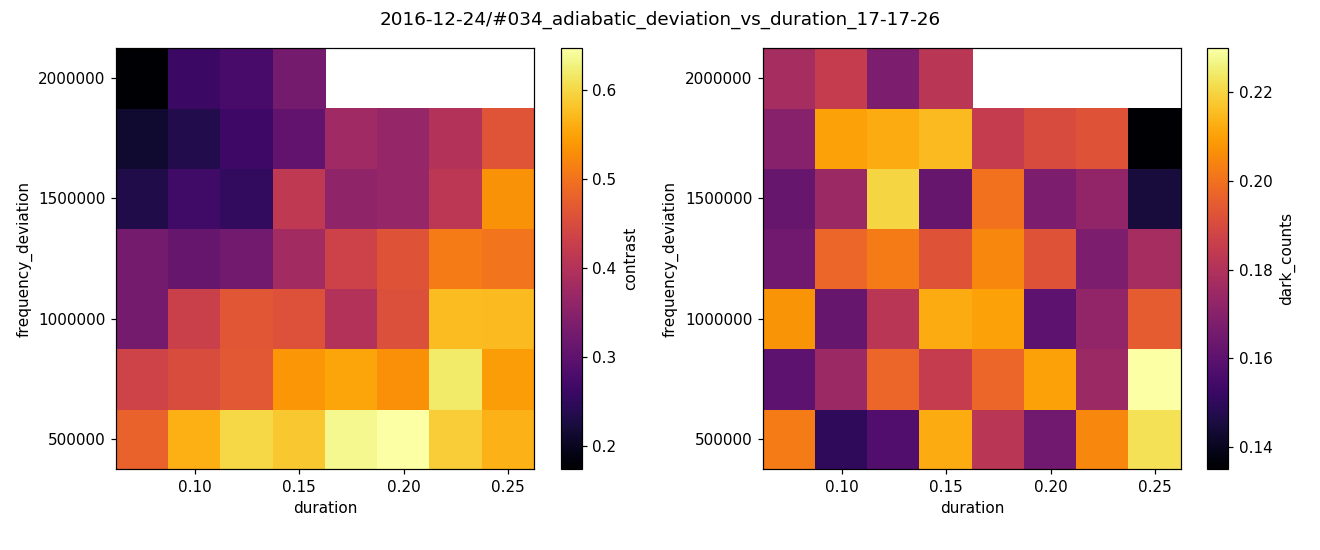

In [11]:
data = qc.load_data('2016-12-24/#034_adiabatic_deviation_vs_duration_17-17-26')
plot = qc.MatPlot(subplots=(1,2), figsize=(12,5))
plot.add(data.contrast, subplot=0, nticks=6)
plot.add(data.dark_counts, subplot=1, nticks=6)
plot.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

Number of successful sweeps: 49


<IPython.core.display.Javascript object>


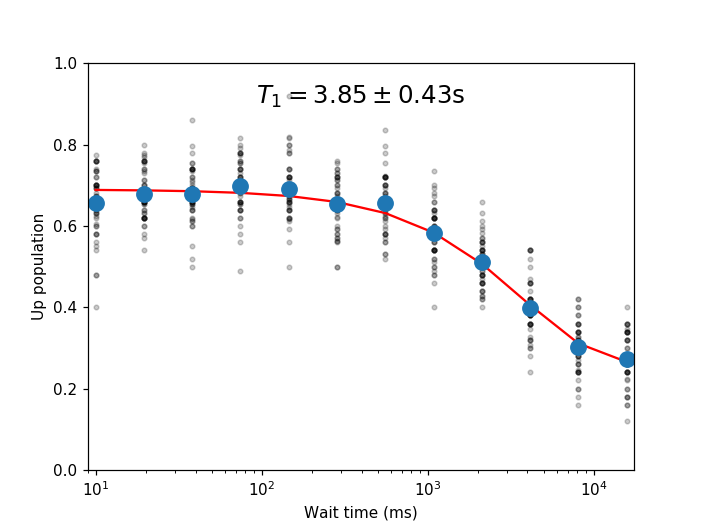

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 28
    # data points      = 12
    # variables        = 3
    chi-square         = 0.002
    reduced chi-square = 0.000
    Akaike info crit   = -95.825
    Bayesian info crit = -94.371
[[Variables]]
    tau:         3850.90800 +/- 427.1477 (11.09%) (init= 15848.9)
    amplitude:   0.43115057 +/- 0.017345 (4.02%) (init= 0.4236822)
    offset:      0.25863249 +/- 0.017264 (6.68%) (init= 0.2739192)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.921 
    C(tau, offset)               = -0.773 
    C(tau, amplitude)            =  0.602 



In [12]:
T1_msmt = T1_Analysis(location='2016-12-24/#044_T1_data_20-52-14')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

# Measurement 7
Still third coulomb peak, testing dark counts value versus contrast

In the measurement below, two scans are performed. We can see that they perform roughly equally, but at high amplitude the T1_parameter gets a higher up_proportion

<IPython.core.display.Javascript object>


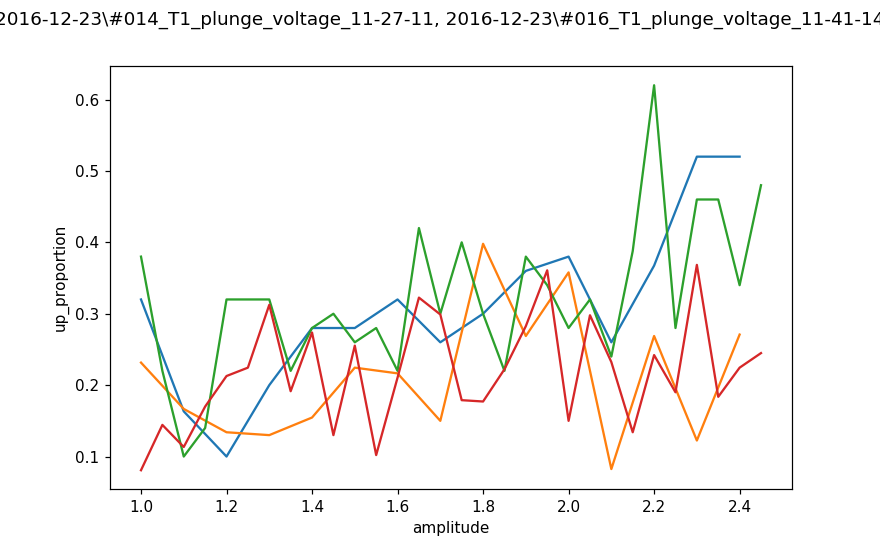

In [13]:
data = qc.load_data('2016-12-23\#014_T1_plunge_voltage_11-27-11')
plot = qc.MatPlot(data.up_proportion)
plot.add(data.dark_counts)

data = qc.load_data('2016-12-23\#016_T1_plunge_voltage_11-41-14')
plot.add(data.up_proportion)
plot.add(data.dark_counts)

In the next measurements, I made some modifications to the parameters.
The T1 parameter now has a steered initialization built-in, and this is removed from the dark_counts parameter.
This will allow me to check if it is indeed the loading that causes a higher up_proportion or not.

The results show that both perform around equally well now.
This means that the loading does not cause a higher up_proportion, but the lack of time in the read state is probably the culprit

T1_parameter: PulseSequence with 5 pulses, duration: 42
- SteeredInitialization(steered_initialization, t_no_blip=120 ms, t_max_wait=400, t_buffer=30, V_th=0.3333333333333333)
- DCPulse(plunge, A=2, t_start=0, t_stop=20)
- DCPulse(read, A=0, t_start=20, t_stop=40)
- DCPulse(final, A=0, t_start=40, t_stop=42)

dark_counts_parameter: PulseSequence with 2 pulses, duration: 20
- DCPulse(read, A=0, t_start=0, t_stop=20)

<IPython.core.display.Javascript object>


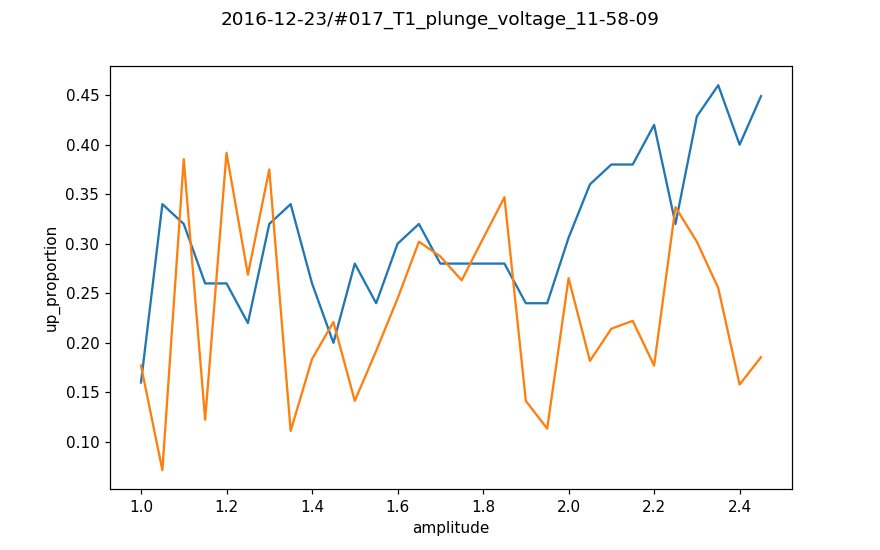

In [14]:
data = qc.load_data('2016-12-23/#017_T1_plunge_voltage_11-58-09')
plot = qc.MatPlot(data.up_proportion)
plot.add(data.dark_counts)

<IPython.core.display.Javascript object>


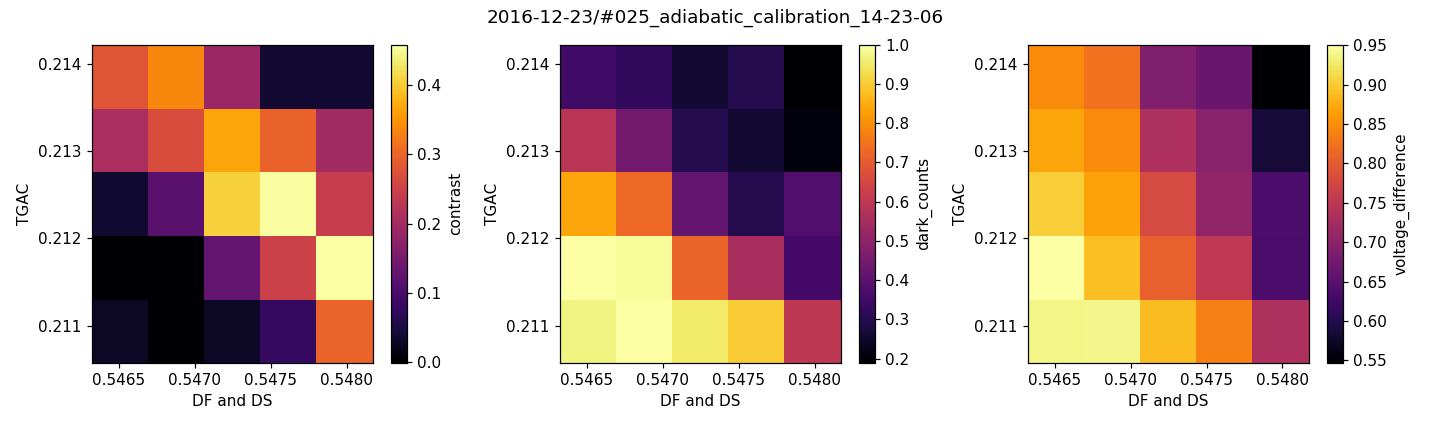

In [15]:
data = qc.load_data('2016-12-23/#025_adiabatic_calibration_14-23-06')
CalibrationPlot(data)

Number of successful sweeps: 6


<IPython.core.display.Javascript object>


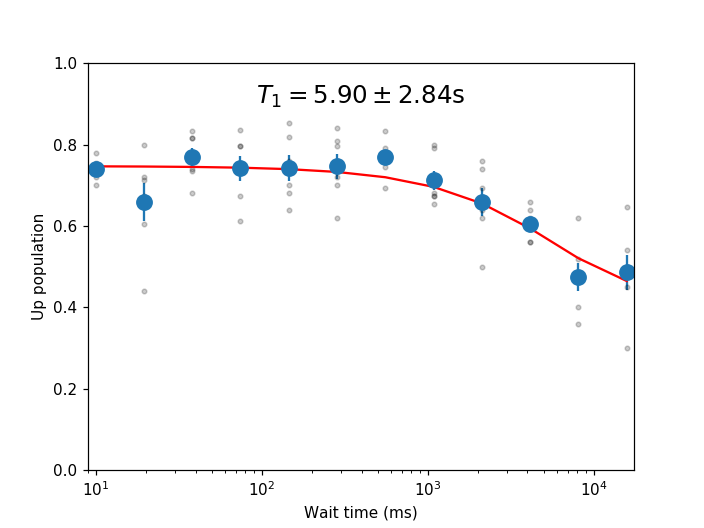

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 35
    # data points      = 12
    # variables        = 3
    chi-square         = 0.014
    reduced chi-square = 0.002
    Akaike info crit   = -75.124
    Bayesian info crit = -73.669
[[Variables]]
    tau:         5896.74636 +/- 2.84e+03 (48.11%) (init= 8111.31)
    amplitude:   0.30323059 +/- 0.060164 (19.84%) (init= 0.2952155)
    offset:      0.44399926 +/- 0.062012 (13.97%) (init= 0.474898)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.967 
    C(tau, offset)               = -0.873 
    C(tau, amplitude)            =  0.791 



In [16]:
T1_msmt = T1_Analysis(location='2016-12-23/#034_T1_data_17-24-03')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

Number of successful sweeps: 24


<IPython.core.display.Javascript object>


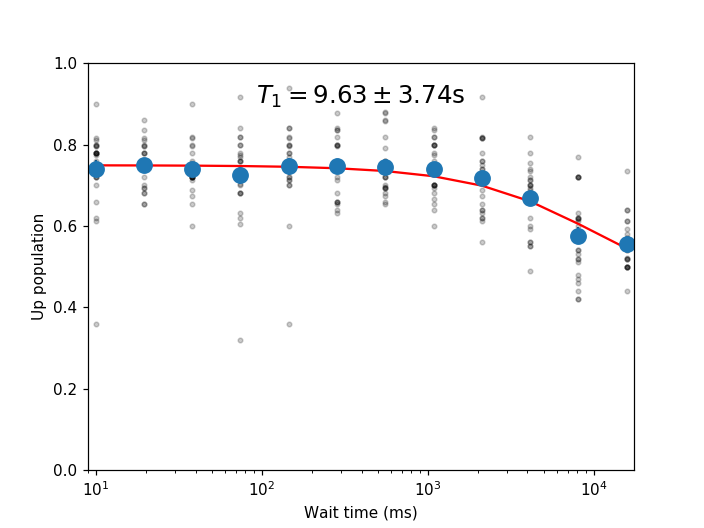

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 36
    # data points      = 12
    # variables        = 3
    chi-square         = 0.002
    reduced chi-square = 0.000
    Akaike info crit   = -96.323
    Bayesian info crit = -94.868
[[Variables]]
    tau:         9628.54603 +/- 3.74e+03 (38.89%) (init= 15848.9)
    amplitude:   0.25357867 +/- 0.050826 (20.04%) (init= 0.1944258)
    offset:      0.49584799 +/- 0.052439 (10.58%) (init= 0.5550066)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.993 
    C(tau, offset)               = -0.953 
    C(tau, amplitude)            =  0.931 



In [17]:
T1_msmt = T1_Analysis(location='2016-12-23/#040_T1_data_21-34-33')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

# Measurement 6
Third coulomb peak (to the left of measurement 4)

<IPython.core.display.Javascript object>


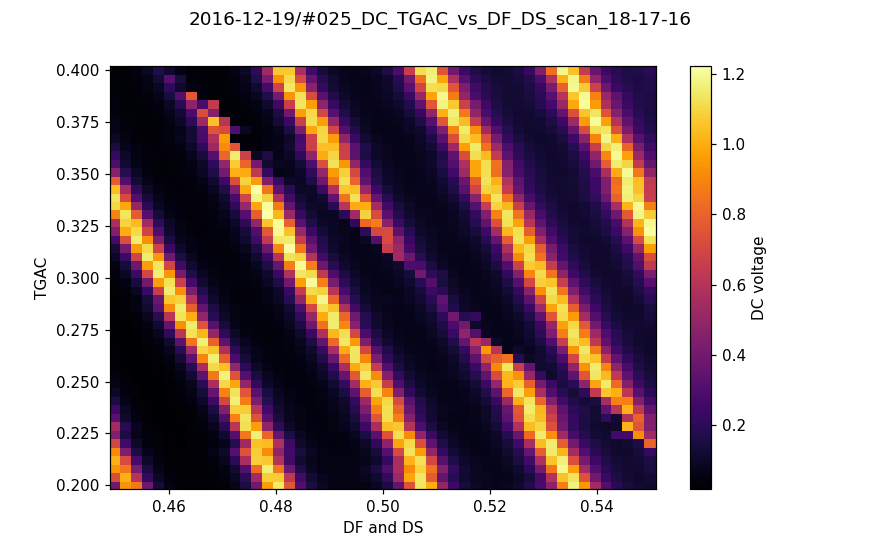

In [18]:
data = qc.load_data('2016-12-19/#025_DC_TGAC_vs_DF_DS_scan_18-17-16')
plot = qc.MatPlot(data.DC_voltage)

Below we perform a measurement of the contrast, which for some reason we can't seem to get high

<IPython.core.display.Javascript object>


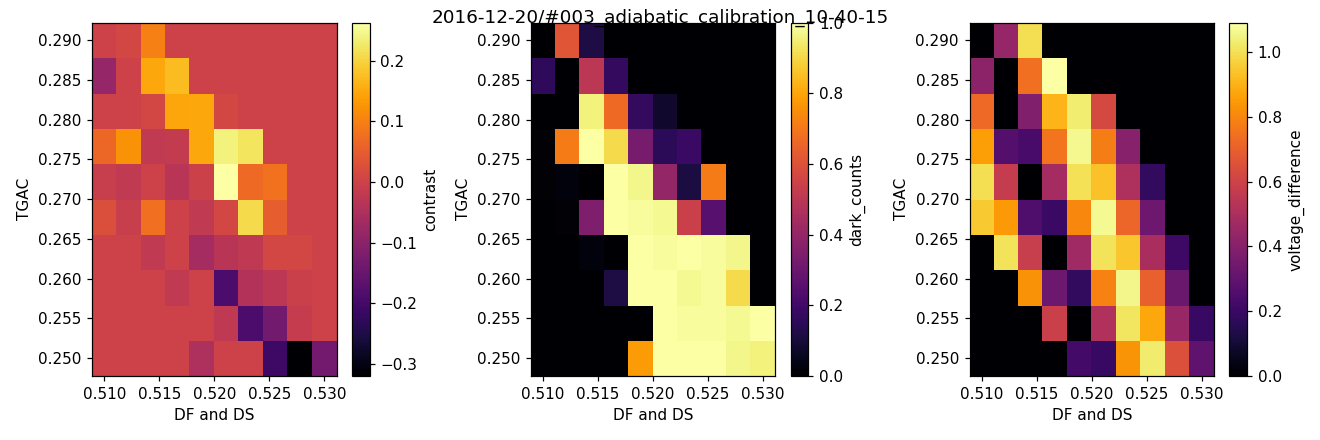

In [19]:
data = qc.load_data('2016-12-20/#003_adiabatic_calibration_10-40-15')
plot = qc.MatPlot(subplots=(1, 3), figsize=(12, 4))
plot.add(data.contrast, subplot=0)
plot.add(data.dark_counts, subplot=1)
plot.add(data.voltage_difference, subplot=2)
plt.tight_layout()

<IPython.core.display.Javascript object>


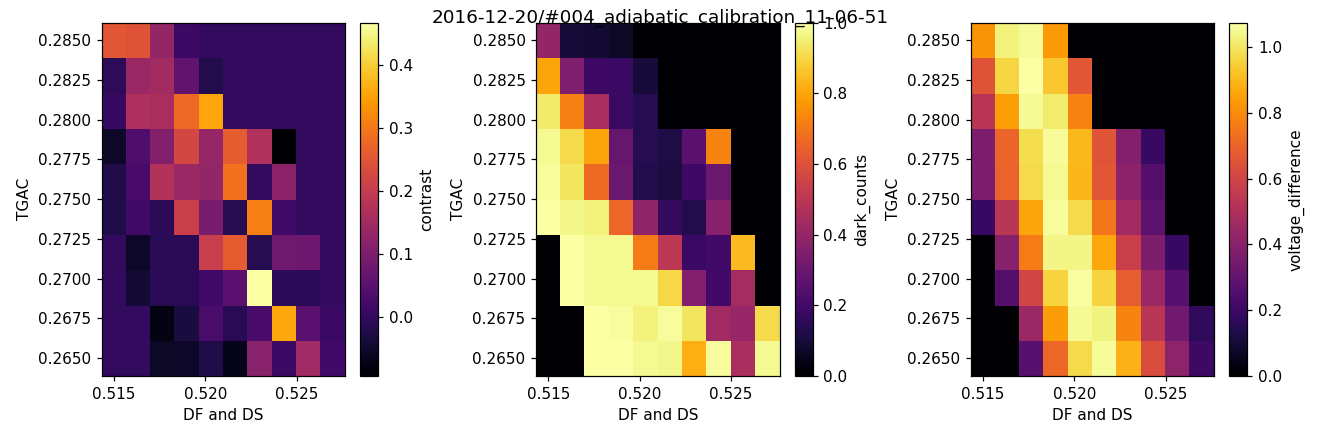

In [20]:
data = qc.load_data('2016-12-20/#004_adiabatic_calibration_11-06-51')
plot = qc.MatPlot(subplots=(1, 3), figsize=(12, 4))
plot.add(data.contrast, subplot=0)
plot.add(data.dark_counts, subplot=1)
plot.add(data.voltage_difference, subplot=2)
plt.tight_layout()

About to move TG to see if this improves things.
TG has been moved from TG(2.06) to TG(2.1).
Below the optimal tuning point before moving TG is shown in green.
Looking at the before and after data, it is most likely that TG has moved

<IPython.core.display.Javascript object>


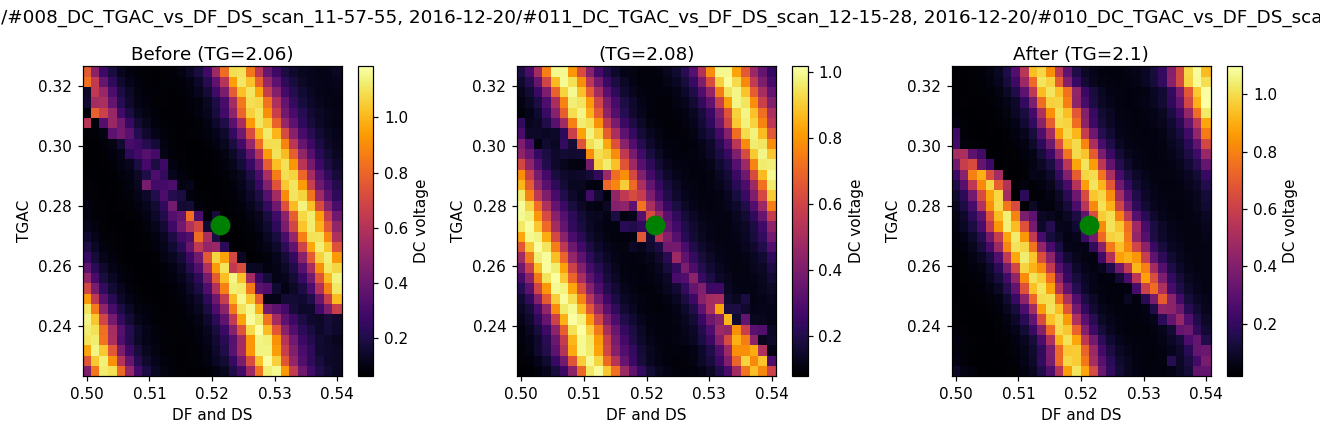

In [21]:
plot = qc.MatPlot(subplots=(1,3), figsize=(12,4))
data = qc.load_data('2016-12-20/#008_DC_TGAC_vs_DF_DS_scan_11-57-55')
plot.add(data.DC_voltage, subplot=0)
plot[0].set_title('Before (TG=2.06)')

data = qc.load_data('2016-12-20/#011_DC_TGAC_vs_DF_DS_scan_12-15-28')
plot.add(data.DC_voltage, subplot=1)
plot[1].set_title('(TG=2.08)')

data = qc.load_data('2016-12-20/#010_DC_TGAC_vs_DF_DS_scan_12-07-45')
plot.add(data.DC_voltage, subplot=2)
plot[2].set_title('After (TG=2.1)')

for k in range(3):
    plot[k].plot([0.5213], [0.2736], 'go', ms=12)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

Moved to TG(2.1), and performing small scan around calibration point

<IPython.core.display.Javascript object>


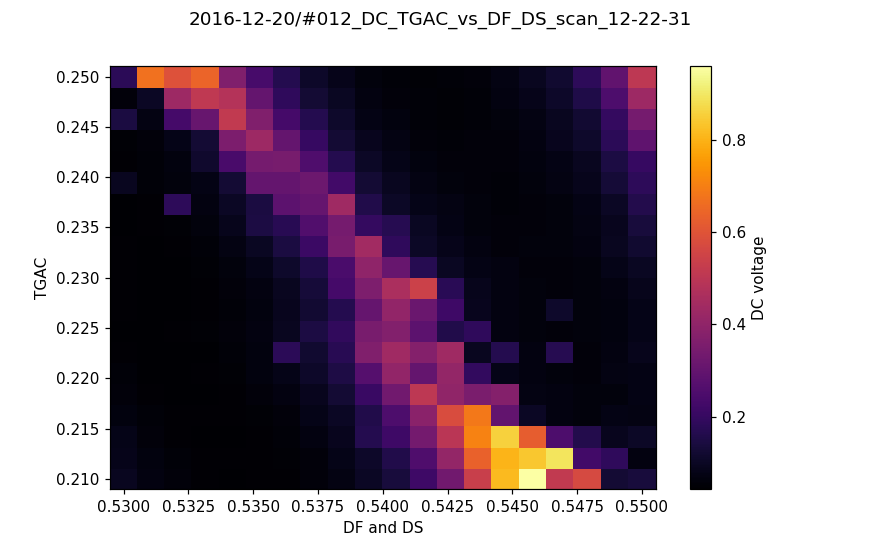

In [22]:
data = qc.load_data('2016-12-20/#012_DC_TGAC_vs_DF_DS_scan_12-22-31')
plot = qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


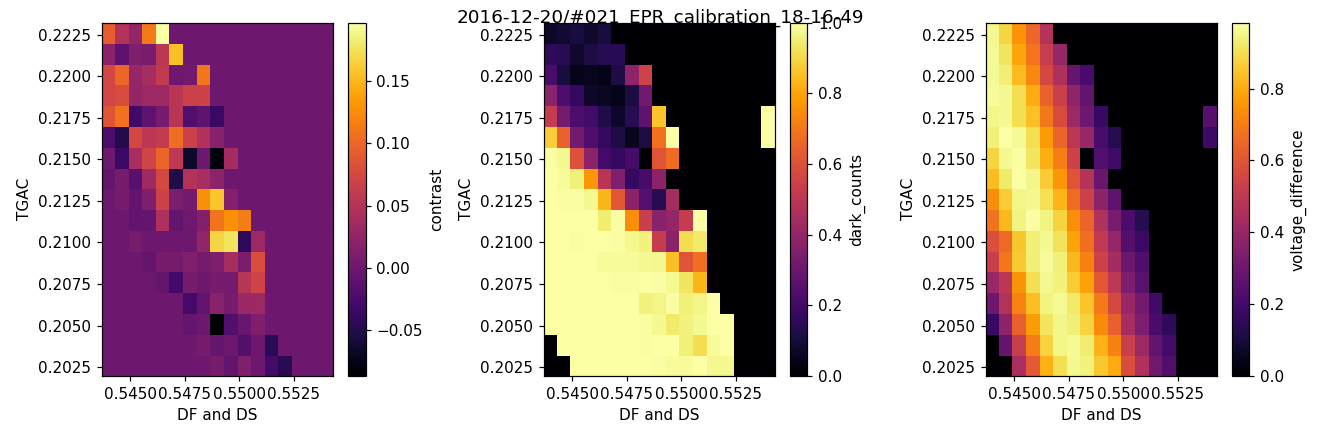

In [23]:
data = qc.load_data('2016-12-20/#021_EPR_calibration_18-16-49')
plot = qc.MatPlot(subplots=(1, 3), figsize=(12, 4))
plot.add(data.contrast, subplot=0)
plot.add(data.dark_counts, subplot=1)
plot.add(data.voltage_difference, subplot=2)
plt.tight_layout()

Here a T1 measurement is performed, but the contrast is really low

Number of successful sweeps: 23


<IPython.core.display.Javascript object>


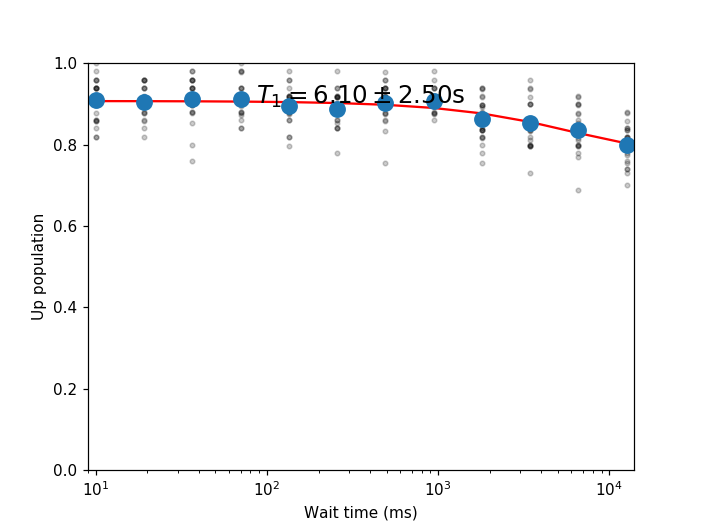

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 32
    # data points      = 12
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -107.001
    Bayesian info crit = -105.547
[[Variables]]
    tau:         6098.93918 +/- 2.50e+03 (40.95%) (init= 12589.3)
    amplitude:   0.11935467 +/- 0.022579 (18.92%) (init= 0.1127163)
    offset:      0.78801203 +/- 0.023426 (2.97%) (init= 0.8003453)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.984 
    C(tau, offset)               = -0.924 
    C(tau, amplitude)            =  0.880 



In [24]:
T1_msmt = T1_Analysis(location='2016-12-20/#042_T1_data_21-44-15')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

However, the dark counts are significantly lower. It is not very clear why this is the case, although I found that the read duration was 40 ms instead of 20 ms.

<IPython.core.display.Javascript object>


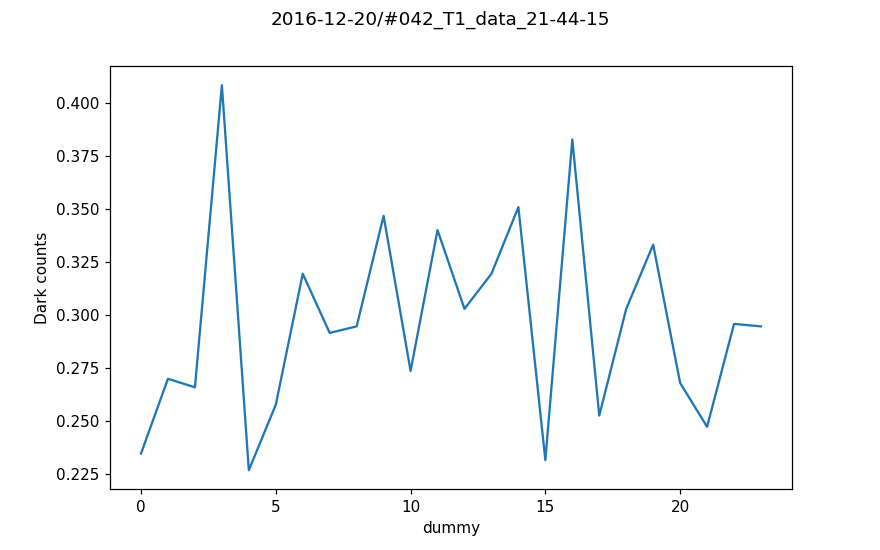

In [25]:
qc.MatPlot(T1_msmt.dataset.dark_counts)

Below I decided to do a scan of t_read in an adiabatic ESR measurement.
It seems that there is an optimum around 20 ms, although it is not that clear, even with much averaging.
What is clear is that a long t_read is not good.

<IPython.core.display.Javascript object>


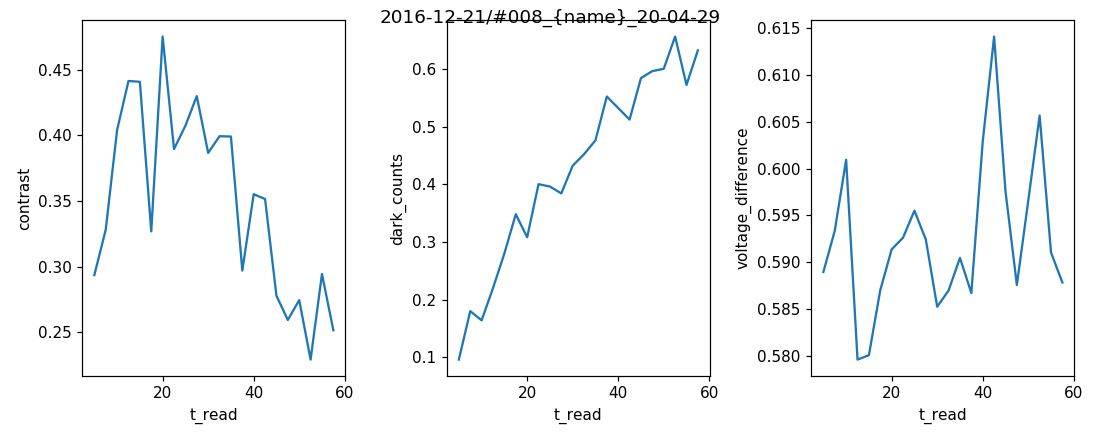

In [26]:
data = qc.load_data('2016-12-21/#008_{name}_20-04-29')
plot = qc.MatPlot(subplots=(1, 3), figsize=(10, 4))
plot.add(data.contrast, subplot=0)
plot.add(data.dark_counts, subplot=1)
plot.add(data.voltage_difference, subplot=2)
plt.tight_layout()

Number of successful sweeps: 31


<IPython.core.display.Javascript object>


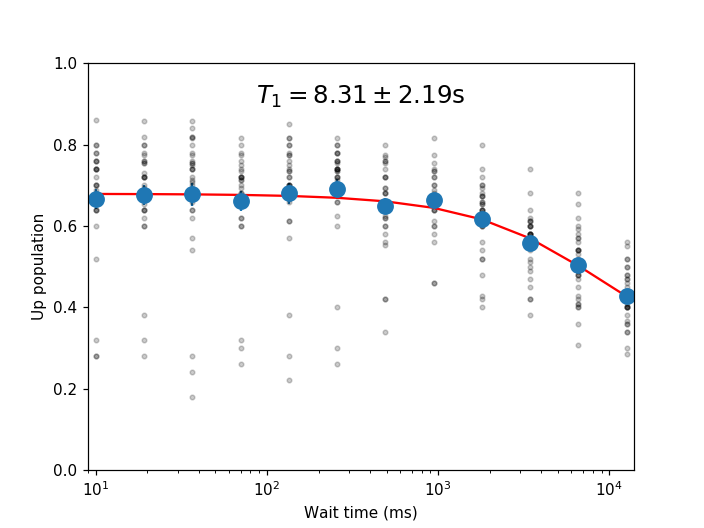

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 27
    # data points      = 12
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -102.203
    Bayesian info crit = -100.748
[[Variables]]
    tau:         8306.18837 +/- 2.19e+03 (26.33%) (init= 12589.3)
    amplitude:   0.32326915 +/- 0.045684 (14.13%) (init= 0.2633213)
    offset:      0.35591217 +/- 0.047083 (13.23%) (init= 0.4276497)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.995 
    C(tau, offset)               = -0.961 
    C(tau, amplitude)            =  0.944 



In [27]:
T1_msmt = T1_Analysis(location='2016-12-21/#010_T1_data_20-52-59')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

Performed another overnight T1 scan, again with terrible contrast. I found out that the read duration again switched to 20ms

Number of successful sweeps: 33


<IPython.core.display.Javascript object>


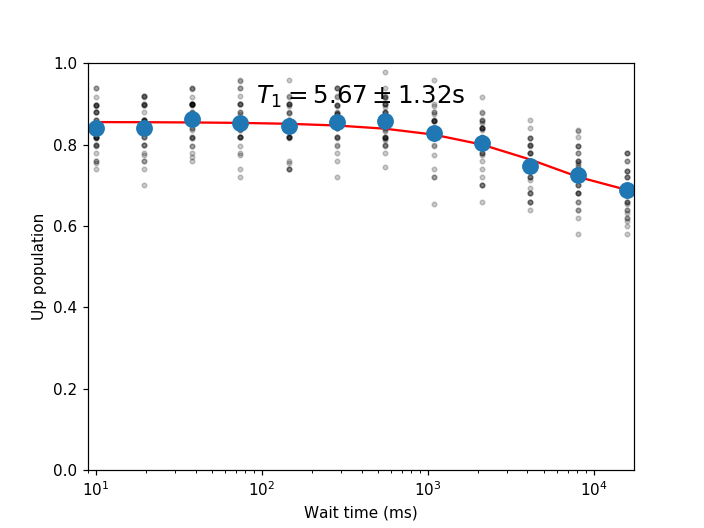

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 12
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -104.588
    Bayesian info crit = -103.133
[[Variables]]
    tau:         5670.84238 +/- 1.32e+03 (23.32%) (init= 15848.9)
    amplitude:   0.17794326 +/- 0.016865 (9.48%) (init= 0.1744362)
    offset:      0.67791877 +/- 0.017353 (2.56%) (init= 0.6883983)
[[Correlations]] (unreported correlations are <  0.100)
    C(amplitude, offset)         = -0.964 
    C(tau, offset)               = -0.864 
    C(tau, amplitude)            =  0.775 



In [28]:
T1_msmt = T1_Analysis(location='2016-12-22/#019_T1_data_17-30-40')
T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report())

# Measurement 5
These measurements are performed on the coulomb peak to the right of previous measurements

First we perform an adiabatic calibration scan.
The maximum contrast is quite low, around 0.5.

<IPython.core.display.Javascript object>


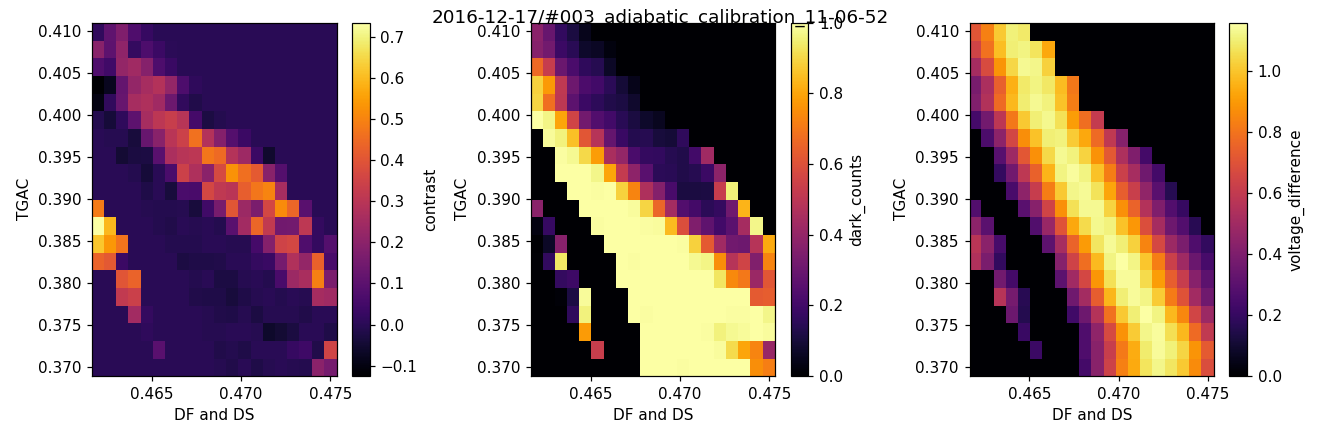

In [29]:
data = qc.load_data('2016-12-17/#003_adiabatic_calibration_11-06-52')
plot = qc.MatPlot(subplots=(1, 3), figsize=(12, 4))
plot.add(data.contrast, subplot=0)
plot.add(data.dark_counts, subplot=1)
plot.add(data.voltage_difference, subplot=2)
plt.tight_layout()

Here I perform a T1 measurement, which shows a much longer T1 time.
I stopped the measurement after 12 sweeps, because it had a maximum of 30 sweeps.

Number of successful sweeps: 12


<IPython.core.display.Javascript object>


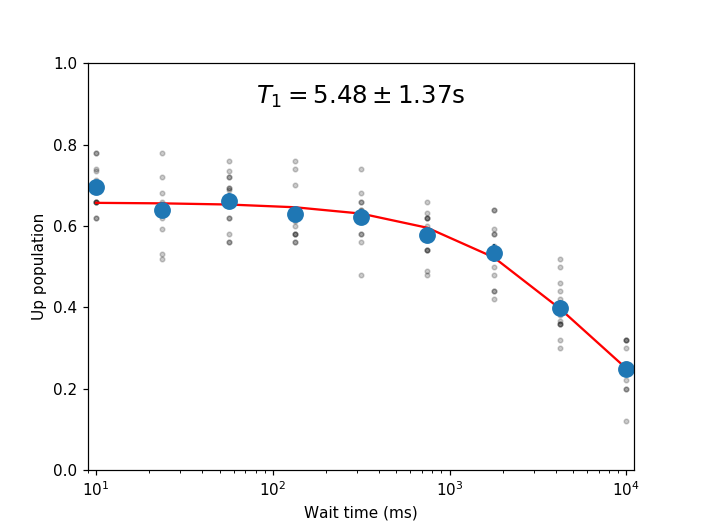

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 31
    # data points      = 9
    # variables        = 3
    chi-square         = 0.003
    reduced chi-square = 0.000
    Akaike info crit   = -67.359
    Bayesian info crit = -66.767
[[Variables]]
    tau:         5480.93765 +/- 1.37e+03 (24.99%) (init= 10000)
    amplitude:   0.48664269 +/- 0.056852 (11.68%) (init= 0.4464073)
    offset:      0.17112610 +/- 0.059113 (34.54%) (init= 0.2483333)



In [30]:
T1_msmt = T1_Analysis(location='2016-12-17/#004_T1_data_15-52-24', T1_label='up_proportion_5_0_0')
ax = T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report(show_correl=False))

After this, the measurement was redone with more sweeps.
However, we see in this case that something is going wrong the the T1 data. I'm not sure where this comes from

Number of successful sweeps: 27


<IPython.core.display.Javascript object>


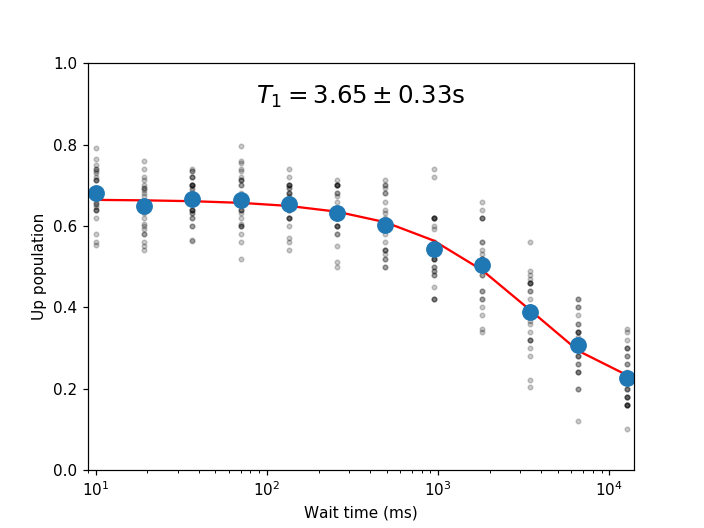

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 12
    # variables        = 3
    chi-square         = 0.001
    reduced chi-square = 0.000
    Akaike info crit   = -102.142
    Bayesian info crit = -100.687
[[Variables]]
    tau:         3649.24942 +/- 326.0472 (8.93%) (init= 12589.3)
    amplitude:   0.44591270 +/- 0.015089 (3.38%) (init= 0.4541118)
    offset:      0.21950340 +/- 0.015316 (6.98%) (init= 0.2261829)



In [31]:
T1_msmt = T1_Analysis(location='2016-12-17/#005_T1_data_20-59-42',T1_label='up_proportion_5_0_0')
ax = T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report(show_correl=False))

I thought perhaps the cause had to do with the fact that the wait times were done sequentially, and so the first ones would have the best tuning. Therefore the wait times were shuffled, and the results shown below.
However, we see that the behaviour has not changed, there is still a slope at low times

Number of successful sweeps: 38


<IPython.core.display.Javascript object>


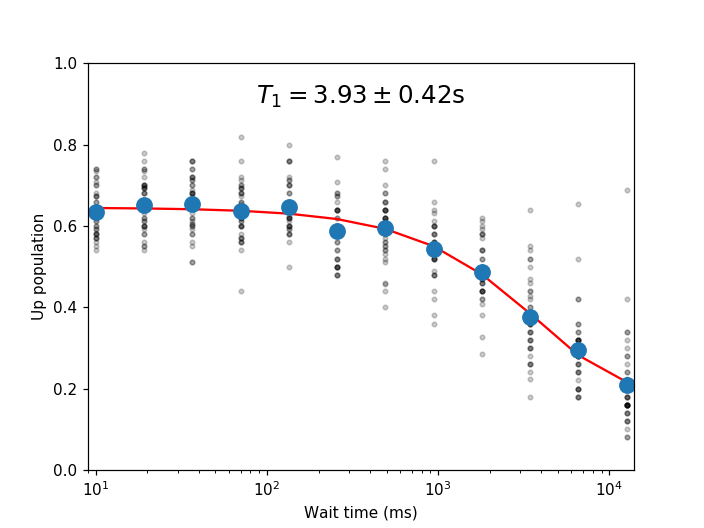

[[Model]]
    Model(fit_function)
[[Fit Statistics]]
    # function evals   = 33
    # data points      = 12
    # variables        = 3
    chi-square         = 0.002
    reduced chi-square = 0.000
    Akaike info crit   = -98.581
    Bayesian info crit = -97.127
[[Variables]]
    tau:         3931.99635 +/- 424.7649 (10.80%) (init= 12589.3)
    amplitude:   0.44717165 +/- 0.018711 (4.18%) (init= 0.4453357)
    offset:      0.19815281 +/- 0.019117 (9.65%) (init= 0.2098966)



In [32]:
T1_msmt = T1_Analysis(location='2016-12-18/#001_T1_data_11-46-20' ,T1_label='up_proportion_5_0_0')
ax = T1_msmt.plot_T1()
print(T1_msmt.fit_result.fit_report(show_correl=False))

# Measurement 4
This measurement set was performed after including auto calibration

Below we performed a repeated sweep of plunge voltage level for fixed wait time.
The autocalibration worked, showing a consistent high contrast. 
However, the found ESR frequency kept alternating between two values, which was found to be due to a bug.

<IPython.core.display.Javascript object>


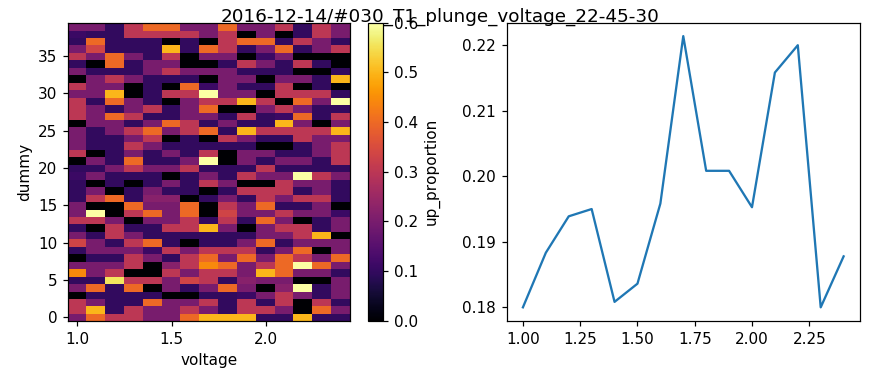

<IPython.core.display.Javascript object>


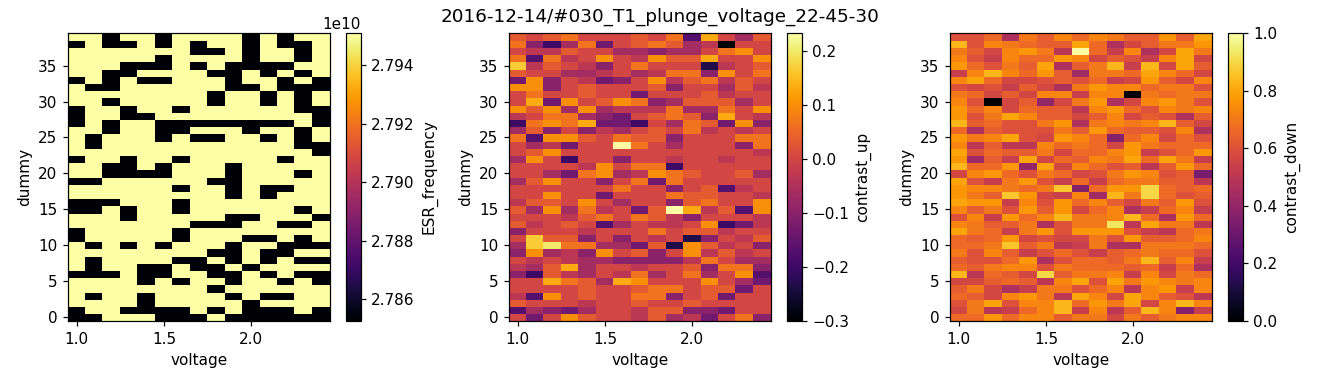

In [2]:
data = qc.load_data('2016-12-14/#030_T1_plunge_voltage_22-45-30')
plot = qc.MatPlot(subplots=(1,2), figsize=(8,3.5))
plot.add(data.up_proportion_0_4_0, subplot=0)
plot.add(data.voltage_set[0], np.nanmean(data.up_proportion_0_4_0, axis=0), subplot=1)
plt.tight_layout()

plot = qc.MatPlot(subplots=(1, 3), figsize=(12,3.5))
plot.add(data.ESR_frequency, subplot=0)
plot.add(data.contrast_down, subplot=2, clim=[0.5, 1])
plot.add(data.contrast_up, subplot=1)
plt.tight_layout()

Another interesting point in the above measurement is that the up proportion is quite low.
Below I perform a T1 scan at plunge depth of 1.8V

Number of successful sweeps: 10


<IPython.core.display.Javascript object>


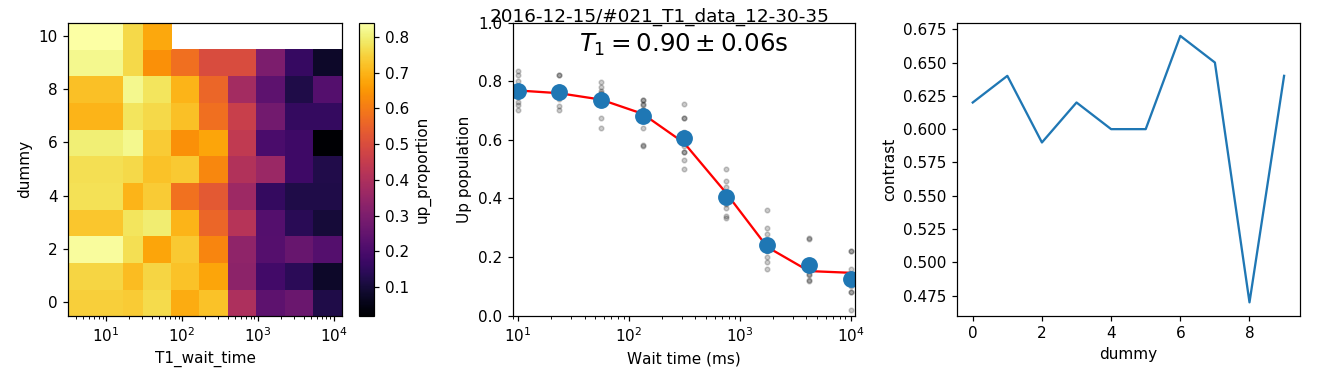

T1 time: 0.90 s


In [41]:
T1_msmt = T1_Analysis('2016-12-15/#021_T1_data_12-30-35', T1_label='up_proportion_7_0_0')
data = T1_msmt.dataset

plot = qc.MatPlot(subplots=(1,3), figsize=(12,3.5))
plot.add(data.up_proportion_7_0_0, subplot=0)
plot[0].set_xscale('log')
T1_msmt.plot_T1(ax=plot[1])
plot.add(data.contrast_3_0, subplot=2)
plt.tight_layout()
print('T1 time: {:.2f} s'.format(T1_msmt.T1/1e3))

The T1 value of 900 ms is much lower than previously (~3s).
No idea why this is happening. We're performing a second scan at 2V plunge depth

In [ ]:
T1_msmt = T1_Analysis(location='2016-12-18/#001_T1_data_11-46-20' ,T1_label='up_proportion_5_0_0')
data = T1_msmt.dataset

plot = qc.MatPlot(subplots=(1,3), figsize=(12,3.5))
plot.add(data.up_proportion_5_0_0, subplot=0)
plot[0].set_xscale('log')
T1_msmt.plot_T1(ax=plot[1])
plot.add(data.contrast, subplot=2)
plt.tight_layout()

We again obtain a low T1 time of 0.85 s.

Next we perform an overnight scan of the 

<IPython.core.display.Javascript object>


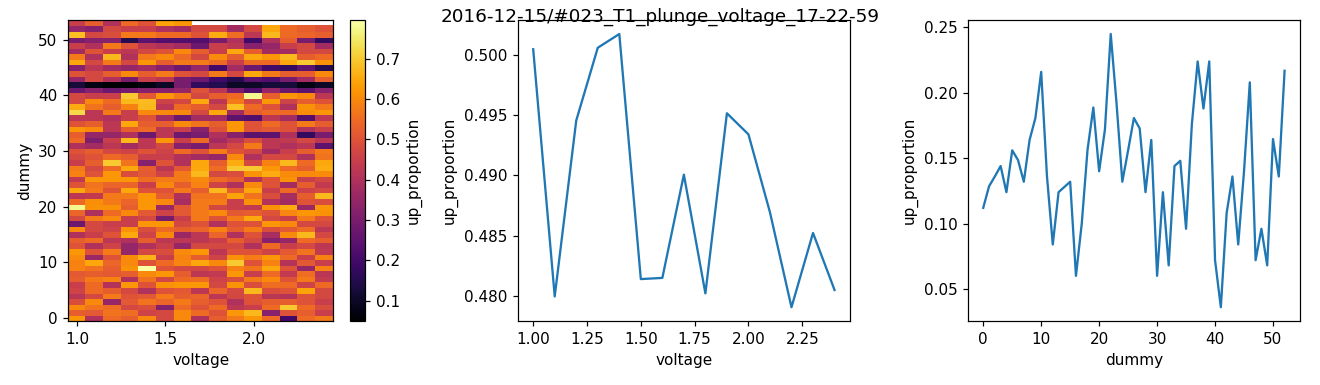

In [36]:
data = qc.load_data('2016-12-15/#023_T1_plunge_voltage_17-22-59')
plot = qc.MatPlot(subplots=(1,3), figsize=(12, 3.5))
plot.add(data.up_proportion_0_3_0, subplot=0)
plot[1].plot(data.voltage_set[0], (np.nanmean(data.up_proportion_0_3_0, axis=0)))
plot[1].set_xlabel('voltage')
plot[1].set_ylabel('up_proportion')
                    
plot.add(data.up_proportion_3_0, subplot=2)
plt.tight_layout()

Out of curiosity, I wanted to check where a good tuning point was on a DC scan.
In the DC scan below, the dot indicates a point with 0.53% contrast

<IPython.core.display.Javascript object>


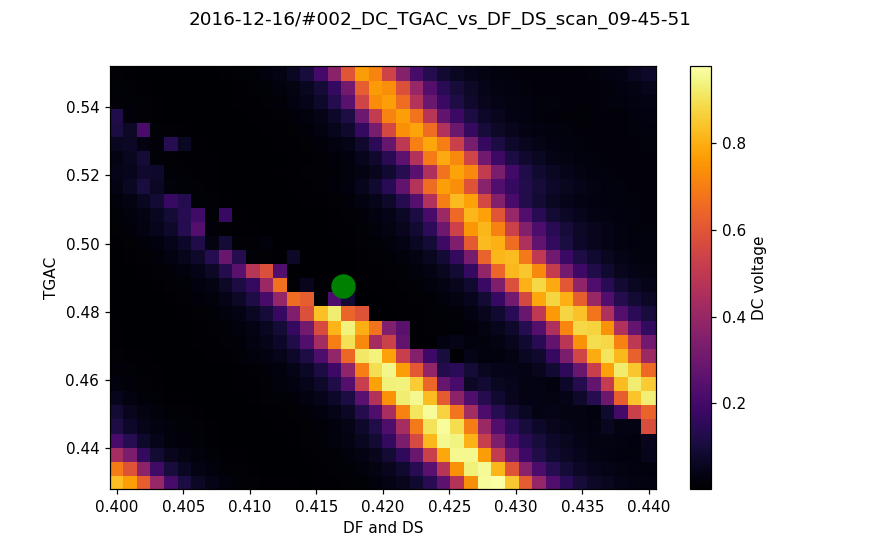

In [37]:
data = qc.load_data('2016-12-16/#002_DC_TGAC_vs_DF_DS_scan_09-45-51')
plot = qc.MatPlot(data.DC_voltage)
plot[0].plot([0.417], [0.4876], 'g.', ms=30)

<IPython.core.display.Javascript object>


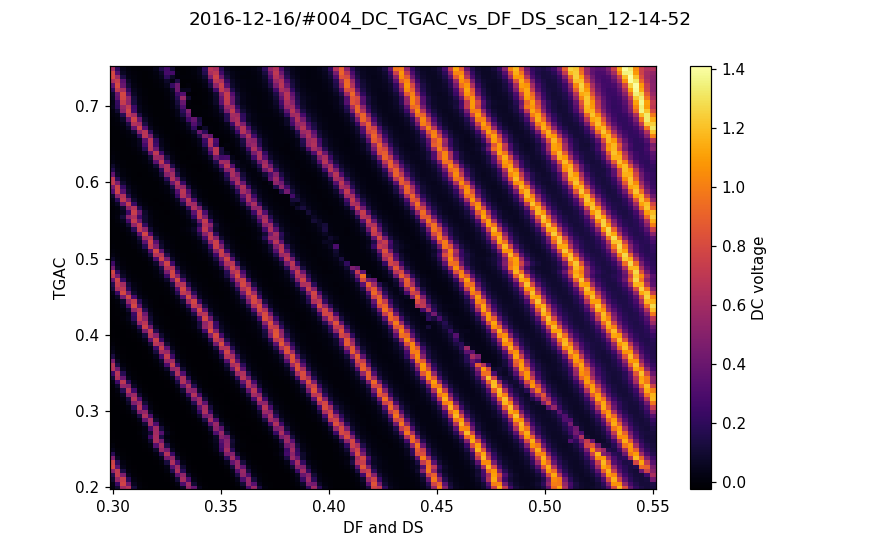

In [38]:
data = qc.load_data('2016-12-16/#004_DC_TGAC_vs_DF_DS_scan_12-14-52')
qc.MatPlot(data.DC_voltage)

Overnight measurement to see how stable a point is. 
We start at a tuning position with high contast, and keep measuring either DF_DS, and TGAC, while keeping the other fixed.
As can be seen, especially TGAC seems to shift a bit over the night

<IPython.core.display.Javascript object>


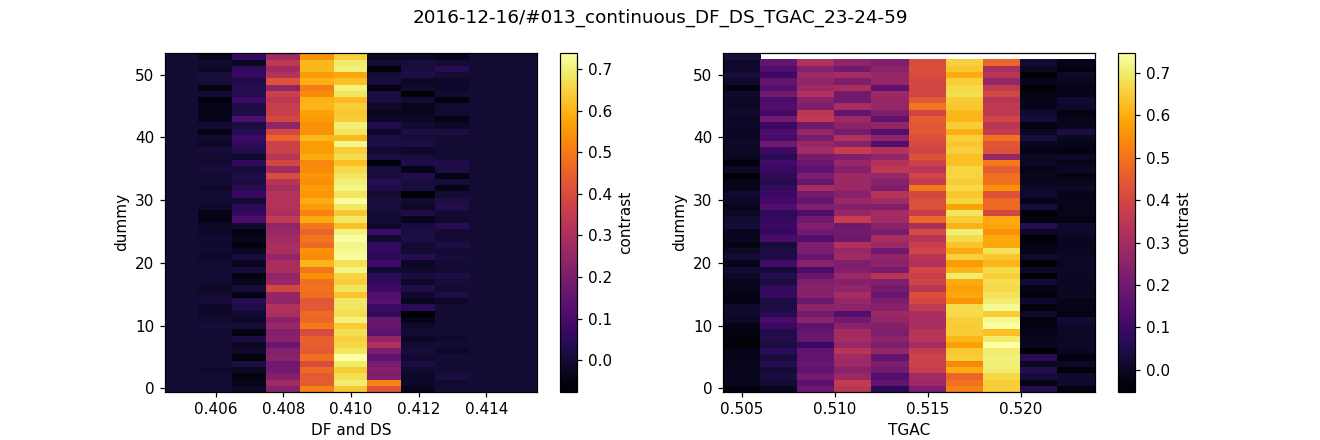

In [39]:
data = qc.load_data('2016-12-16/#013_continuous_DF_DS_TGAC_23-24-59')
plot = qc.MatPlot(subplots=(1,2), figsize=(12, 4))
plot.add(data.contrast_0_0_0, subplot=0)
plot.add(data.contrast_2_0_0, subplot=1)

# Measurement 3

TGAC changed to slot 8 as slot 4 had died
qubit still there

<IPython.core.display.Javascript object>


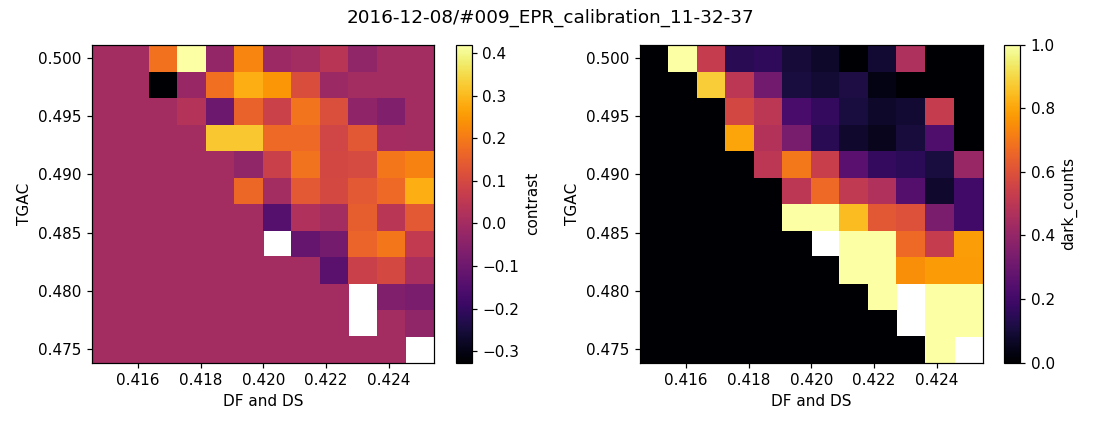

In [40]:
data = qc.load_data('2016-12-08/#009_EPR_calibration_11-32-37')
CalibrationPlot(data)

above epr accidentally done with plunge at 1.5V
DF_DS(0.4195)
TGAC(0.4979)
fidelity_empty: 0.645
fidelity_load: 1.000
fidelity_read: 0.660
up_proportion: 0.373
dark_counts: 0.099
contrast: 0.274

tried run an NMR sweep and the constrast was completly gone, but a DC scan showed that all gates still work
-> new EPR scan
-> no contrast at all
-> new DC scan


<IPython.core.display.Javascript object>


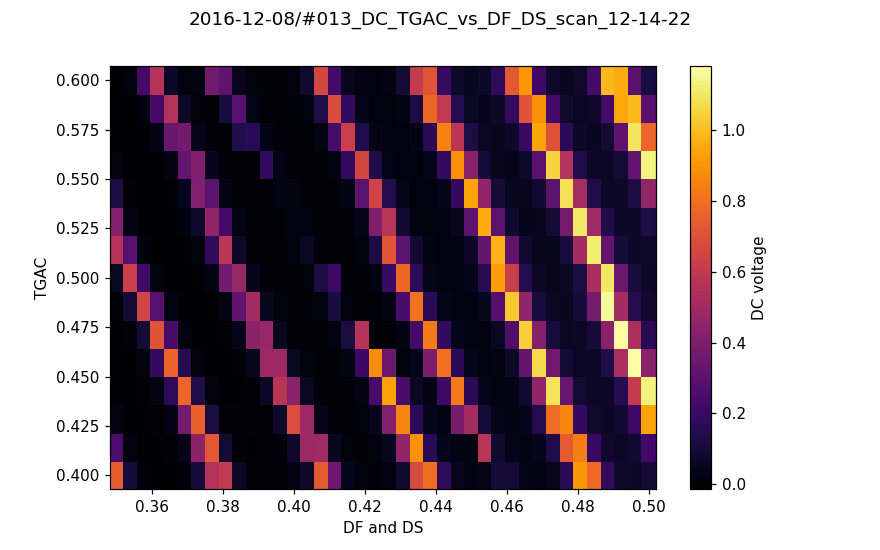

In [41]:
data = qc.load_data('2016-12-08/#013_DC_TGAC_vs_DF_DS_scan_12-14-22')
qc.MatPlot(data.DC_voltage)

DF_DS(0.4173)
TGAC(0.4758)
fidelity_empty: 0.566
fidelity_load: 0.967
fidelity_read: 0.623
up_proportion: 0.459
dark_counts: 0.189
contrast: 0.270

300kHz deviation, 0.5us, 10dbm

<IPython.core.display.Javascript object>


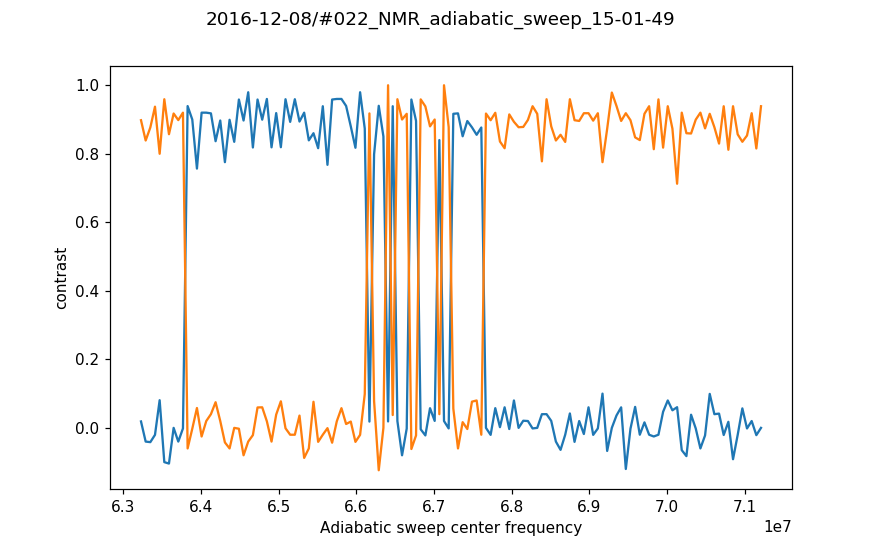

In [42]:
data = qc.load_data('2016-12-08/#022_NMR_adiabatic_sweep_15-01-49')
plot = qc.MatPlot(data.contrast_3_4)
plot.add(data.contrast_5_4)

100kHz deviation, 0.5us, 10dbm

<IPython.core.display.Javascript object>


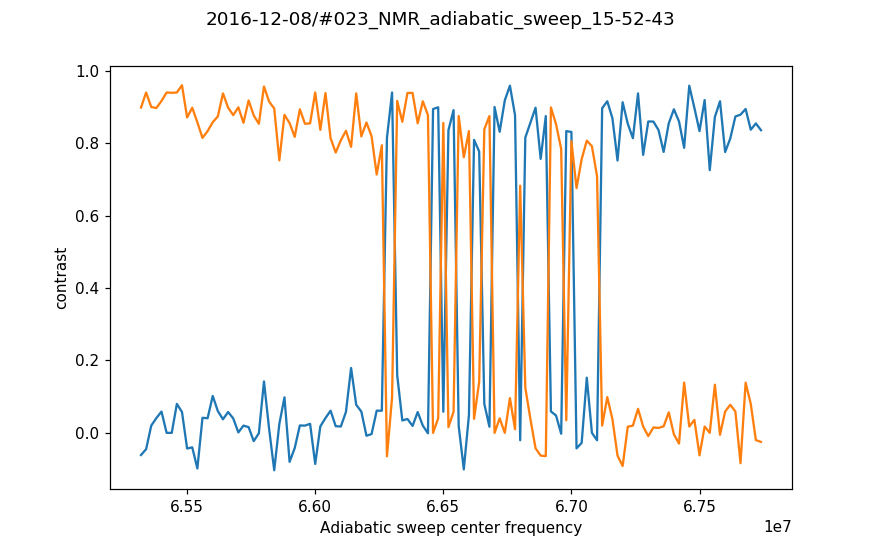

In [43]:
data = qc.load_data('2016-12-08/#023_NMR_adiabatic_sweep_15-52-43')
plot = qc.MatPlot(data.contrast_3_4)
plot.add(data.contrast_5_4)

Below a scan is performed where first the find_ESR_parameter measures contrast at the two ESR frequencies.
Of the two frequencies, the one with the best contrast is chosen to be the current ESR frequency.
This value is used to update adiabatic_sweep_parameter, which then performs a final contrast scan.

This measurement shows that we can update the ESR frequency during a measurement.

<IPython.core.display.Javascript object>


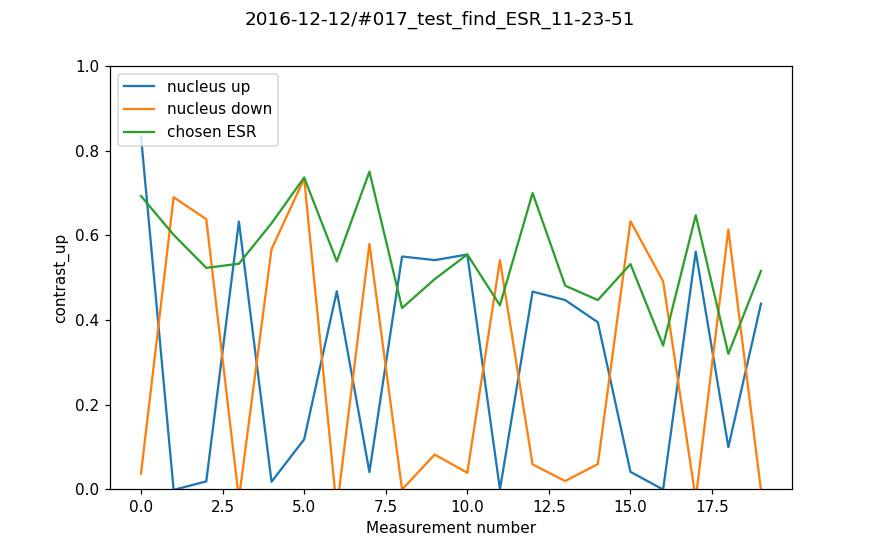

In [6]:
data = qc.load_data('2016-12-12/#017_test_find_ESR_11-23-51')
plot = qc.MatPlot(data.contrast_up, label='nucleus up')
plot.add(data.contrast_down, label='nucleus down')
plot.add(data.contrast_5_4, label='chosen ESR')
plt.xlabel('Measurement number')
plt.ylim(0, 1)
plt.legend(loc='upper left')

One point of concern is that the contrast also seems to fluctuate significantly.
To measure this fluctuation, the contrast is measured continuously for 250 samples each, with the results shown below.
Measurement took 55 mins

<IPython.core.display.Javascript object>


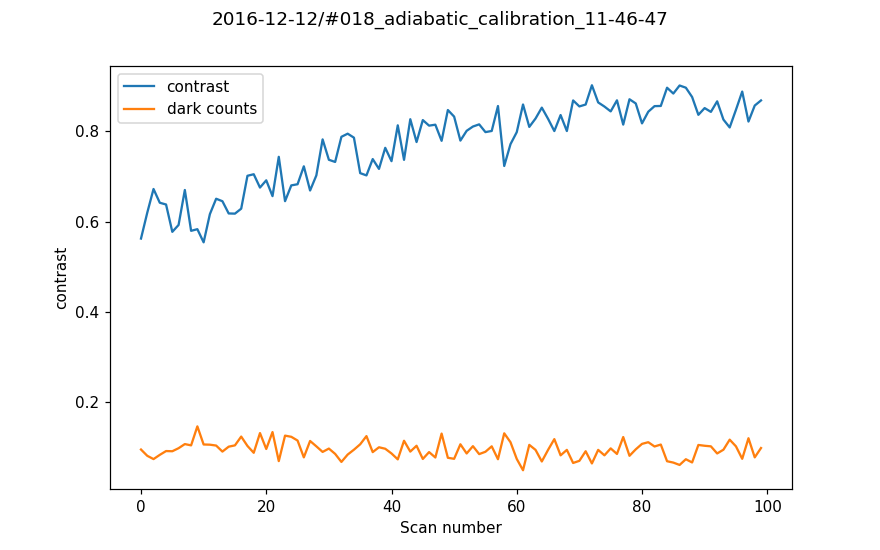

In [7]:
data = qc.load_data( '2016-12-12/#018_adiabatic_calibration_11-46-47')
plot = qc.MatPlot(data.contrast, label='contrast')
plot.add(data.dark_counts, label='dark counts')
plt.xlabel('Scan number')
plt.legend(loc='best');

<IPython.core.display.Javascript object>


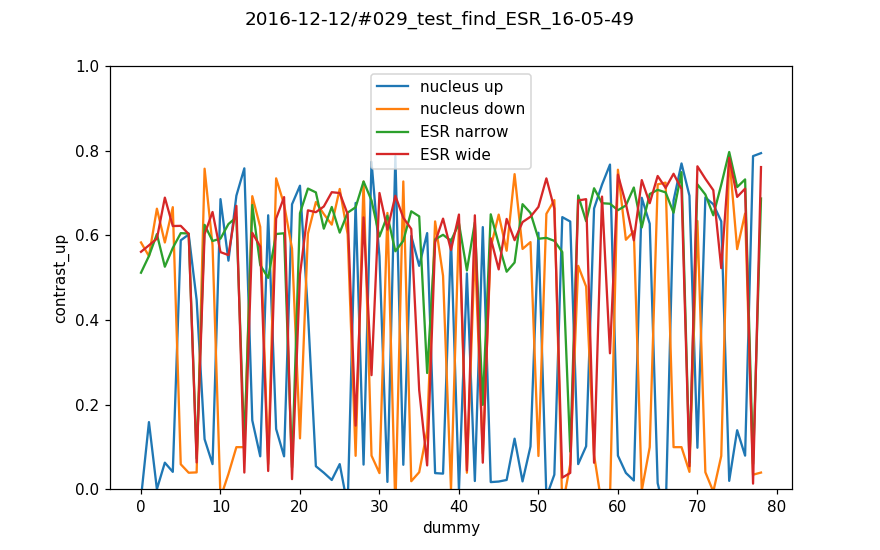

In [8]:
data = qc.load_data( '2016-12-12/#029_test_find_ESR_16-05-49')
plot = qc.MatPlot(data.contrast_up, label='nucleus up')
plot.add(data.contrast_down, label='nucleus down')
plot.add(data.contrast_8_4, label='ESR narrow')
plot.add(data.contrast_12_4, label='ESR wide')
plt.ylim(0, 1)
plt.legend(fontsize=10, loc='best')

Below we performed an oernight scan of the contrast at fixed T1 wait time 4s as we vary the plunge voltage.
Unfortunately we see that the contrast has significantly shifted as time progressed.

<IPython.core.display.Javascript object>


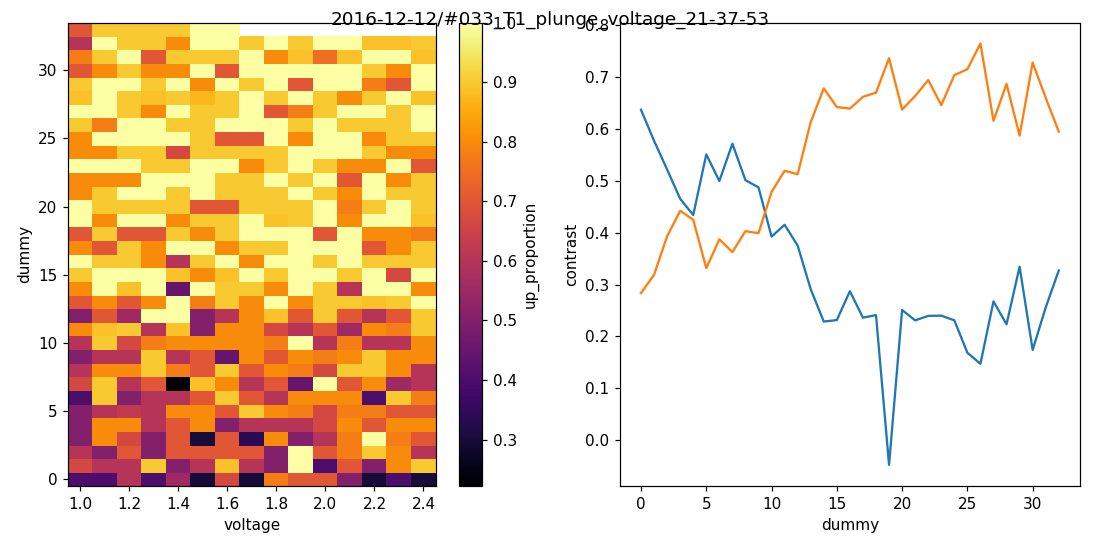

In [9]:
data = qc.load_data('2016-12-12/#033_T1_plunge_voltage_21-37-53')
plot = qc.MatPlot(subplots=(1,2), figsize=(10,5))
plot.add(data.up_proportion_0_4_0, subplot=0)
plot.add(data.contrast, subplot=1)
plot.add(data.dark_counts, subplot=1)
# plot.add(data.ESR_frequency, subplot=1)
plt.tight_layout()

### ESR power dependence

<IPython.core.display.Javascript object>


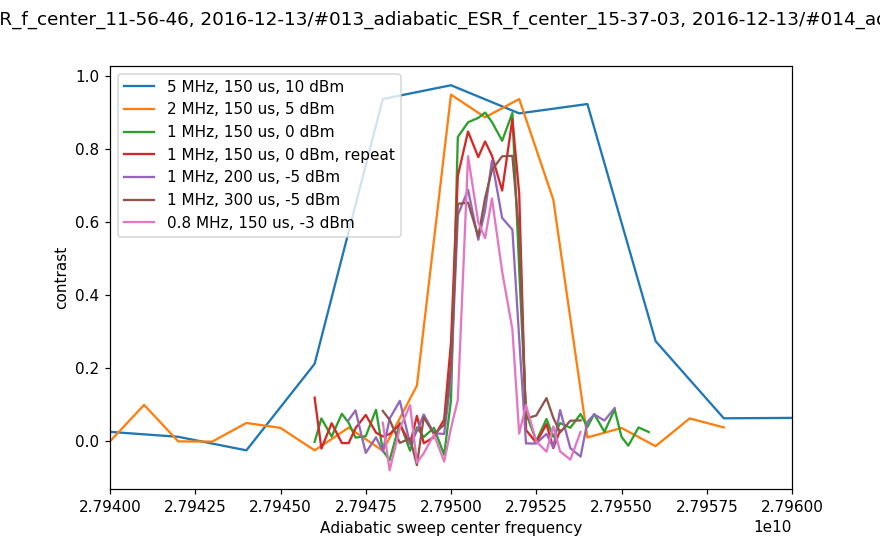

(27940000000.0, 27960000000.0)

In [10]:
#tuning was a bitch again.. 
#DF_DS(0.41388), TGAC(0.4872), fidelity_read: 0.746, up_proportion: 0.966, dark_counts: 0.047, contrast: 0.919
# power 10dbm, duration 0.15ms, freq deviation 5MHz, steps 2MHz
data = qc.load_data('2016-12-13/#006_adiabatic_ESR_f_center_11-26-21')
plot = qc.MatPlot(data.contrast, label='5 MHz, 150 us, 10 dBm')

# power 5dbm, duration 0.15ms, freq deviation 2MHz, steps 1MHz
data = qc.load_data('2016-12-13/#007_adiabatic_ESR_f_center_11-48-41')
plot.add(data.contrast, label='2 MHz, 150 us, 5 dBm')

data = qc.load_data('2016-12-13/#008_adiabatic_ESR_f_center_11-56-46')
plot.add(data.contrast, label='1 MHz, 150 us, 0 dBm')

data = qc.load_data('2016-12-13/#013_adiabatic_ESR_f_center_15-37-03')
plot.add(data.contrast, label='1 MHz, 150 us, 0 dBm, repeat')

data = qc.load_data('2016-12-13/#014_adiabatic_ESR_f_center_15-44-01')
plot.add(data.contrast, label='1 MHz, 200 us, -5 dBm')

data = qc.load_data('2016-12-13/#015_adiabatic_ESR_f_center_15-54-23')
plot.add(data.contrast, label='1 MHz, 300 us, -5 dBm')

data = qc.load_data('2016-12-13/#016_adiabatic_ESR_f_center_16-06-37')
plot.add(data.contrast, label='0.8 MHz, 150 us, -3 dBm')

plt.legend(loc='upper left', fontsize=10)
plt.xlim(27.94e9, 27.96e9)

<IPython.core.display.Javascript object>


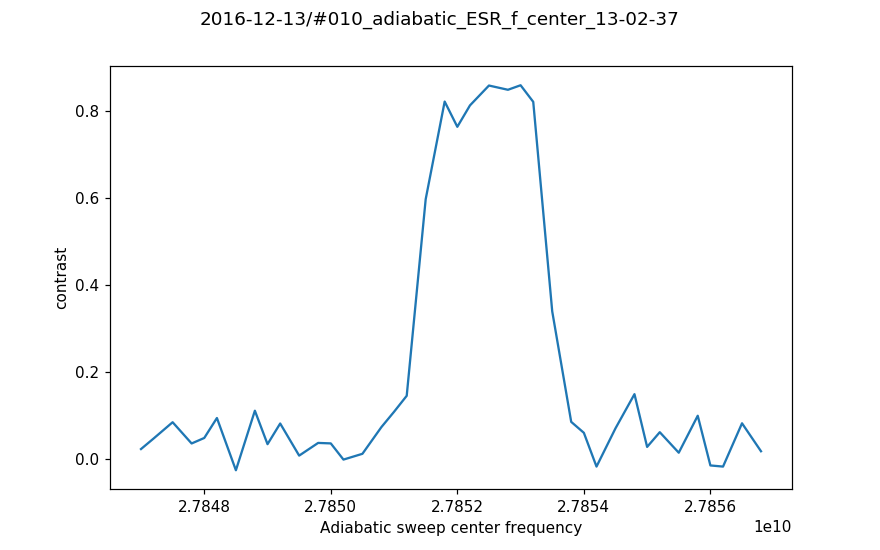

In [11]:
# Other frequency
data = qc.load_data('2016-12-13/#010_adiabatic_ESR_f_center_13-02-37')
plot = qc.MatPlot(data.contrast, label='5 MHz, 150 us, 10 dBm')

Here we try to perform the fixed T1 wait time vs plunge voltage scan, but we again see it has shifted

<IPython.core.display.Javascript object>


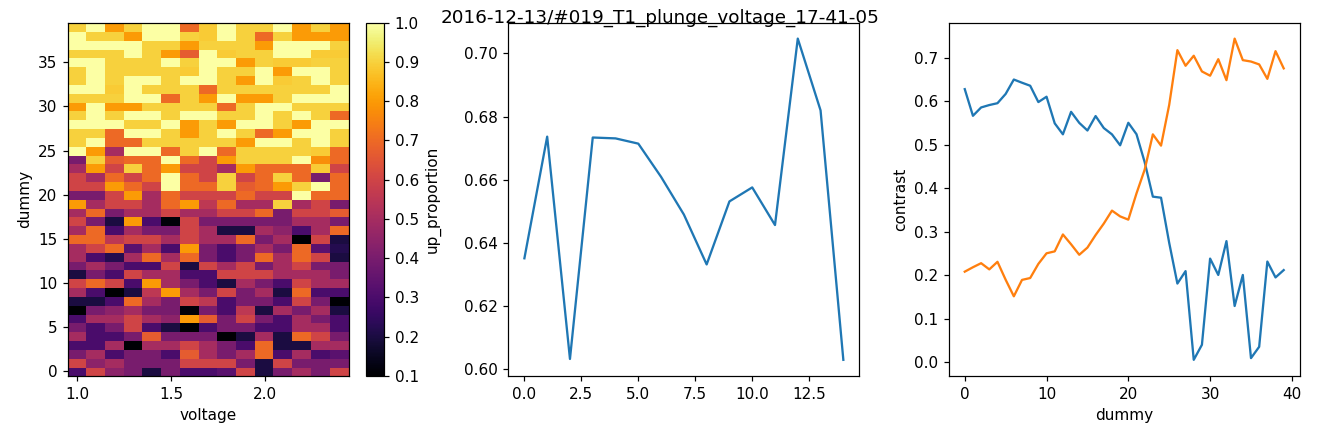

In [12]:
data = qc.load_data('2016-12-13/#019_T1_plunge_voltage_17-41-05')
plot = qc.MatPlot(subplots=(1, 3), figsize=(12,4))
plot.add(data.up_proportion_0_4_0, subplot=0)
plot.add(np.mean(data.up_proportion_0_4_0, axis=0), subplot=1)
plot.add(data.contrast, subplot=2)
plot.add(data.dark_counts, subplot=2)
plt.tight_layout()

# Measurement 2
After figuring out that the nucleus occasionally flipped, we tried performing a DC scan, but noticed strange results.

<IPython.core.display.Javascript object>


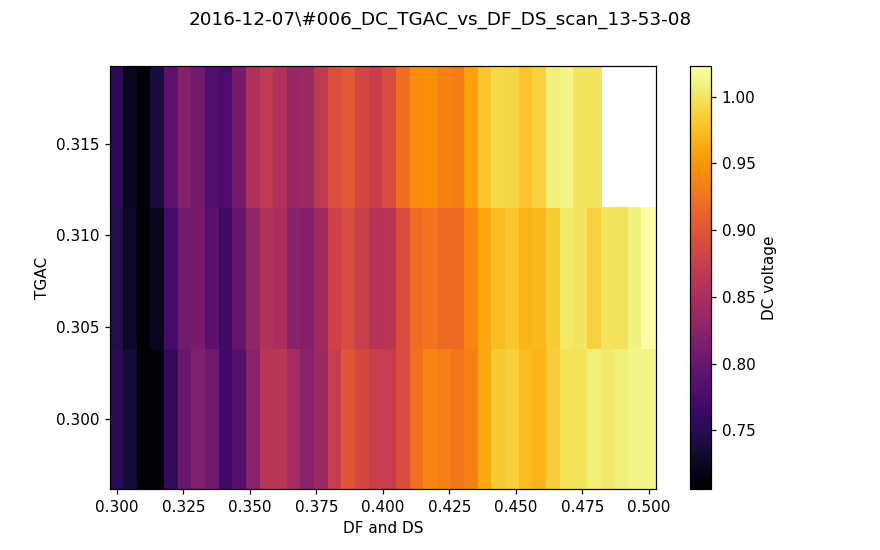

In [13]:
data = qc.load_data('2016-12-07\#006_DC_TGAC_vs_DF_DS_scan_13-53-08')
qc.MatPlot(data.DC_voltage)

Gate voltages
{'DF_raw': 1.938,
 'DS_raw': 1.938,
 'LB_raw': 3.92,
 'RB_raw': 3.92,
 'SRC_raw': 0.25,
 'TGAC_raw': 1.577,
 'TG_raw': 16.48}
 
Pinching off both LB and RB to see if anything changes

<IPython.core.display.Javascript object>


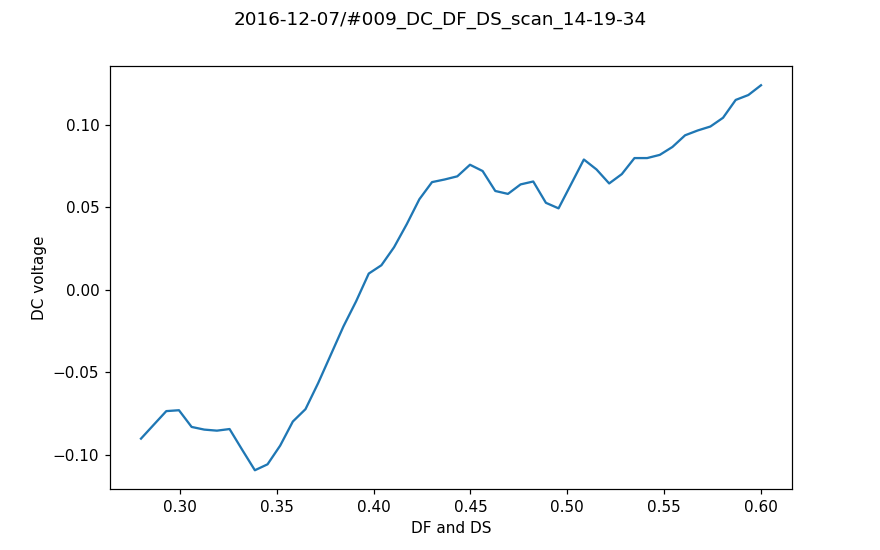

In [14]:
data = qc.load_data('2016-12-07/#009_DC_DF_DS_scan_14-19-34')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


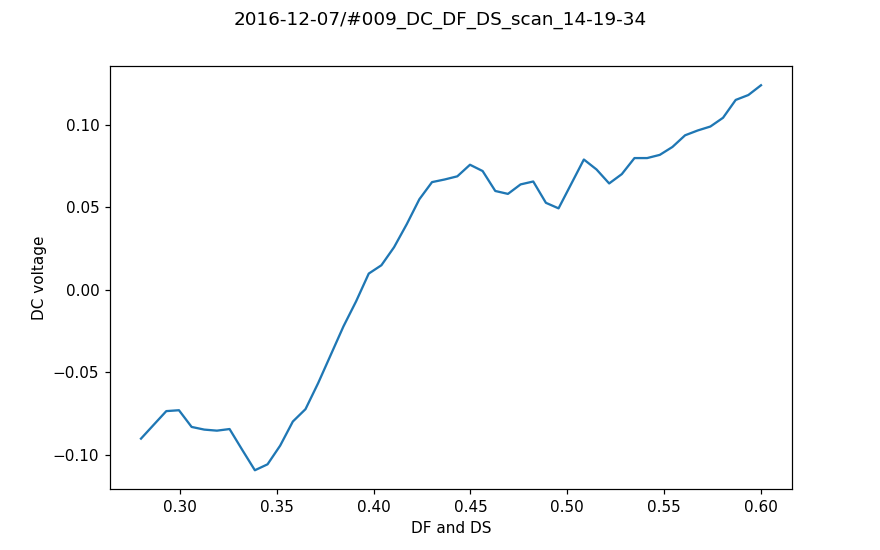

In [15]:
data = qc.load_data('2016-12-07/#009_DC_DF_DS_scan_14-19-34')
qc.MatPlot(data.DC_voltage)

Turnon

<IPython.core.display.Javascript object>


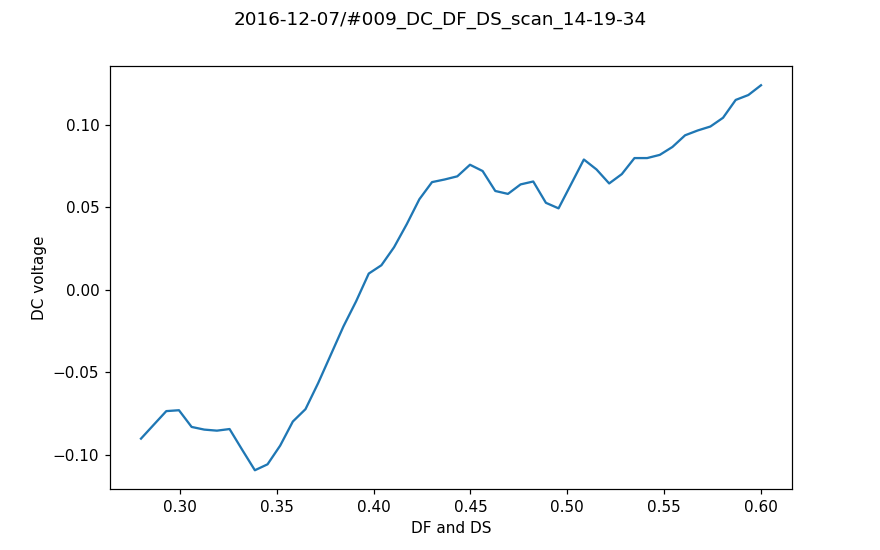

In [16]:
data = qc.load_data('2016-12-07/#009_DC_DF_DS_scan_14-19-34')
qc.MatPlot(data.DC_voltage)

pinchoff

<IPython.core.display.Javascript object>


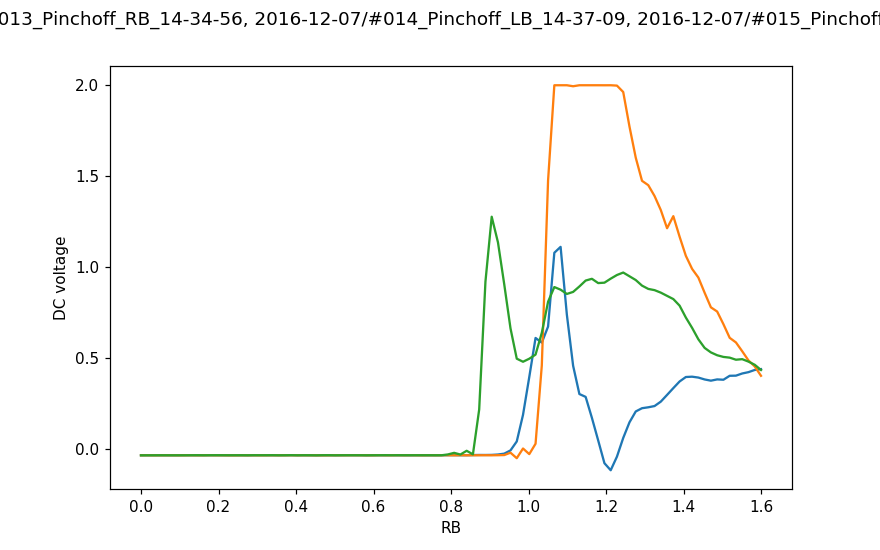

In [17]:
data = qc.load_data('2016-12-07/#013_Pinchoff_RB_14-34-56')
plot = qc.MatPlot(data.DC_voltage)

data = qc.load_data('2016-12-07/#014_Pinchoff_LB_14-37-09')
plot.add(data.DC_voltage)

data = qc.load_data('2016-12-07/#015_Pinchoff_TG_14-39-22')
plot.add(data.DC_voltage)



Here we take a scan at fixed turnon voltage 1.4V.
The x-axis is time in seconds

<IPython.core.display.Javascript object>


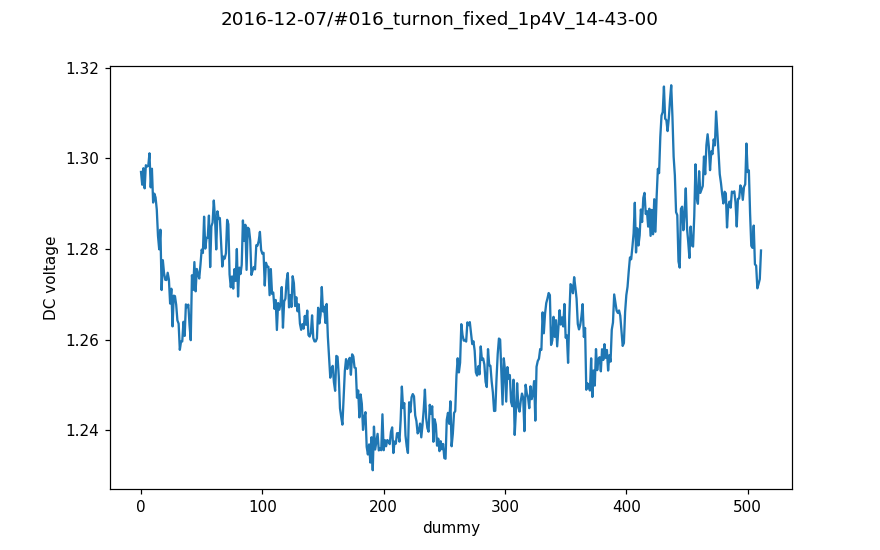

In [18]:
data = qc.load_data('2016-12-07/#016_turnon_fixed_1p4V_14-43-00')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


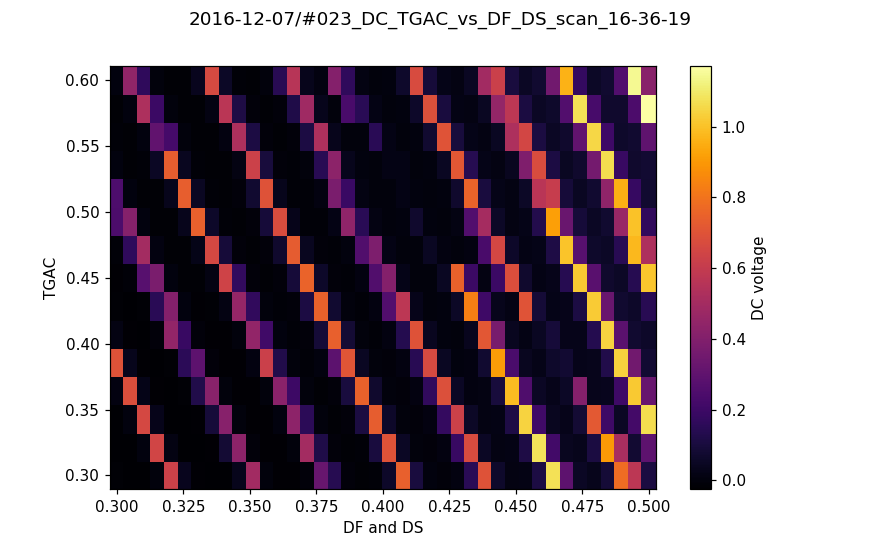

In [19]:
data = qc.load_data('2016-12-07/#023_DC_TGAC_vs_DF_DS_scan_16-36-19')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


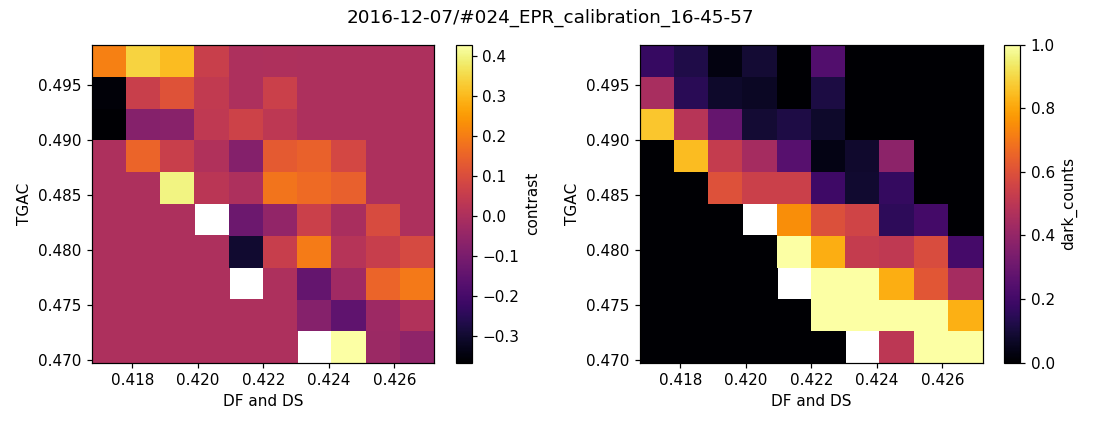

In [20]:
data = qc.load_data('2016-12-07/#024_EPR_calibration_16-45-57')
CalibrationPlot(data)

no points with contrast above 20%
increase plunge depth to 1.8V

<IPython.core.display.Javascript object>


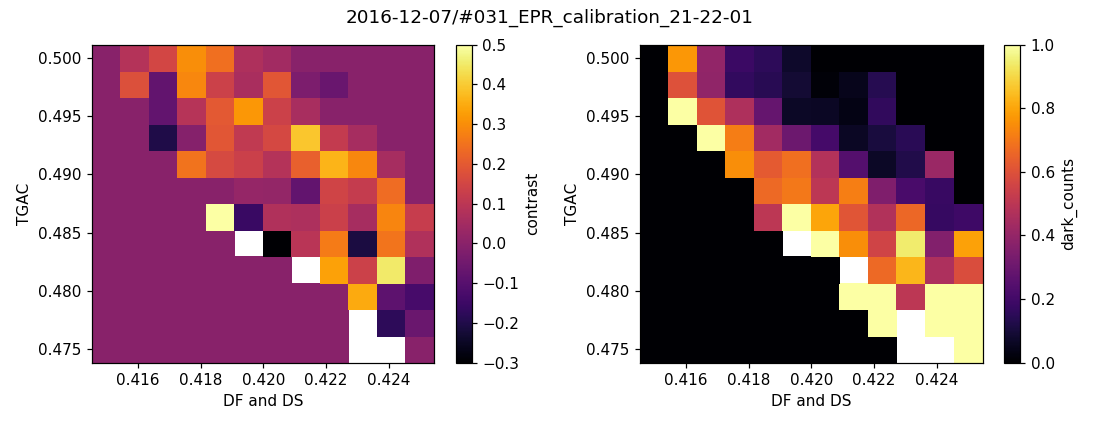

In [21]:
data = qc.load_data('2016-12-07/#031_EPR_calibration_21-22-01')
CalibrationPlot(data)

working point 
DF_DS(0.4213)
TGAC(0.4933)
fidelity_empty: 0.550
fidelity_load: 1.000
fidelity_read: 0.853
up_proportion: 0.377
dark_counts: 0.053
contrast: 0.323

<IPython.core.display.Javascript object>


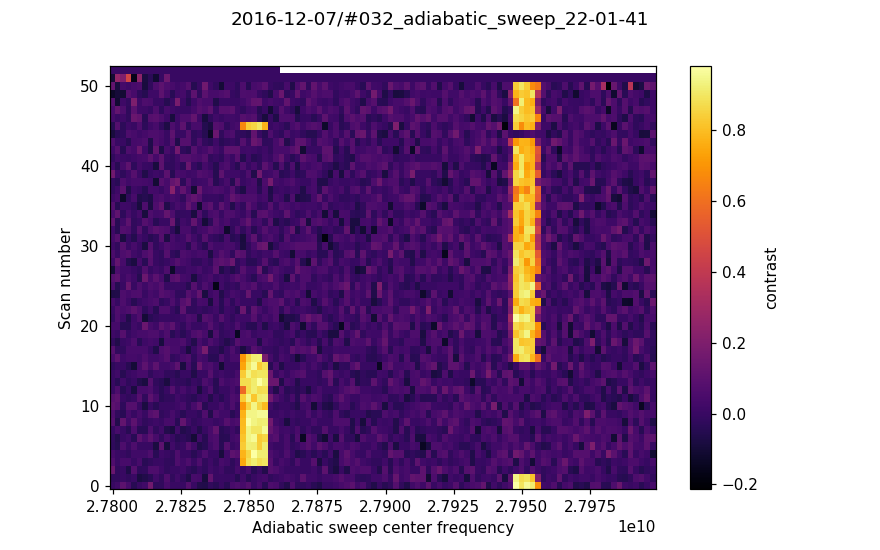

In [22]:
data = qc.load_data('2016-12-07/#032_adiabatic_sweep_22-01-41')
qc.MatPlot(data.contrast)
plt.ylabel('Scan number')

0.15us duration with 10dBm power and 5MHz deviation
ESR frequency nuc spin up = 27.852GHz
ESR frequency nuc spin down = 27.951GHz
-> hyperfine constant A=99MHz

# Measurement 1

<IPython.core.display.Javascript object>


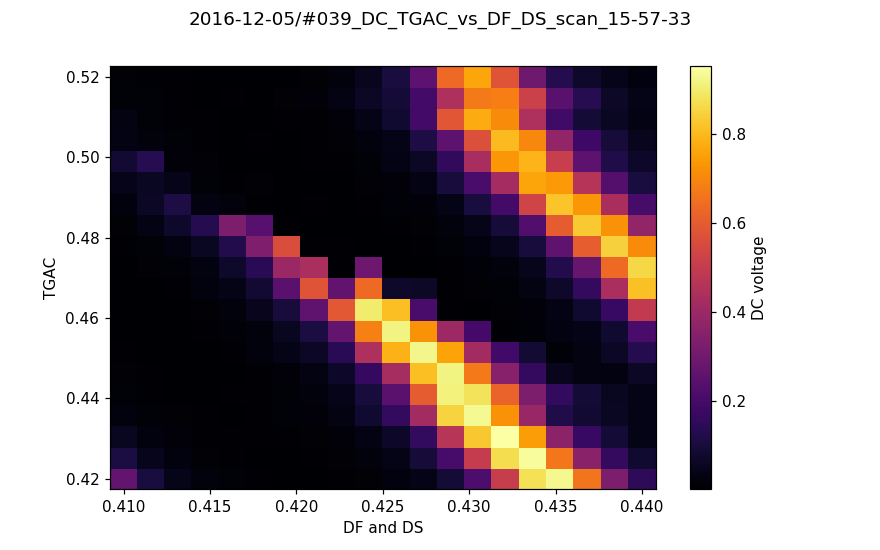

In [23]:
data = qc.load_data('2016-12-05/#039_DC_TGAC_vs_DF_DS_scan_15-57-33')
qc.MatPlot(data.DC_voltage)

<IPython.core.display.Javascript object>


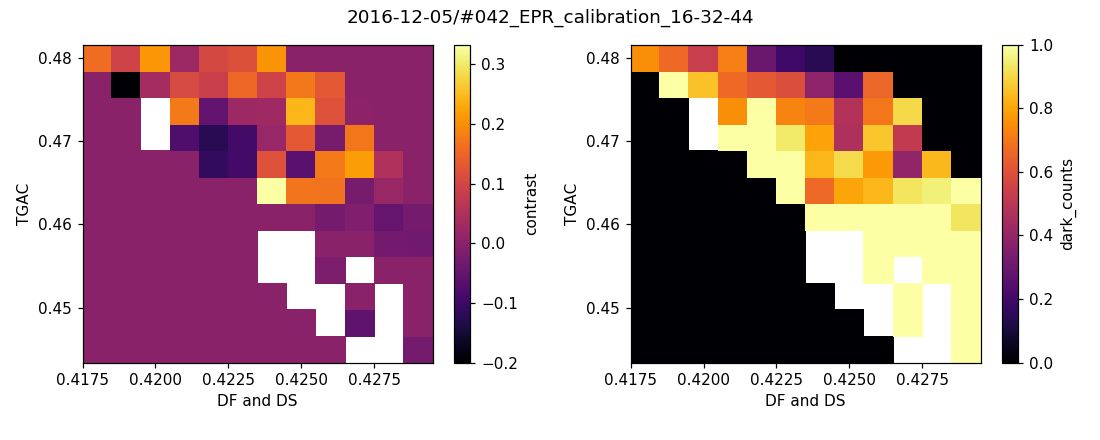

In [24]:
data = qc.load_data('2016-12-05/#042_EPR_calibration_16-32-44')
CalibrationPlot(data)

<IPython.core.display.Javascript object>


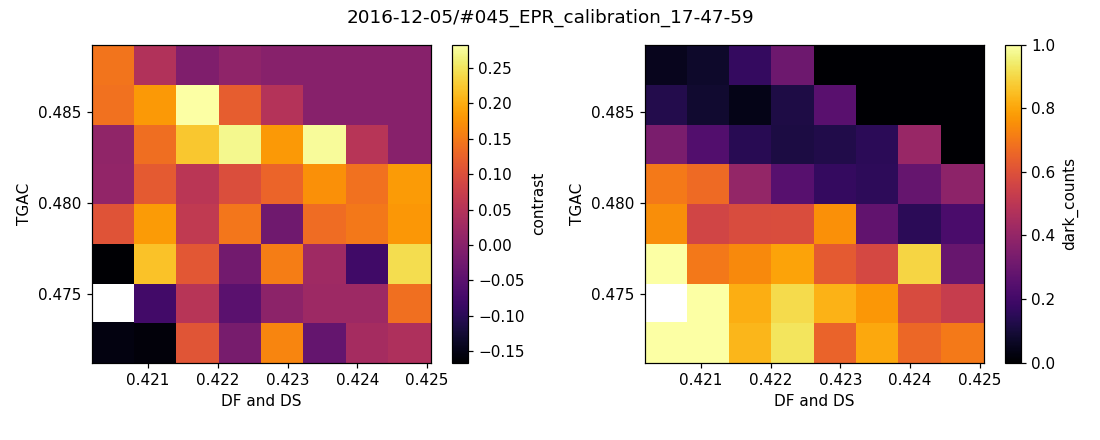

In [25]:
data = qc.load_data('2016-12-05/#045_EPR_calibration_17-47-59')
CalibrationPlot(data)

DF_DS(0.42201)
TGAC(0.4835)

fidelity_empty: 0.448
fidelity_load: 0.771
fidelity_read: 0.707
up_proportion: 0.328
dark_counts: 0.108
contrast: 0.220

<IPython.core.display.Javascript object>


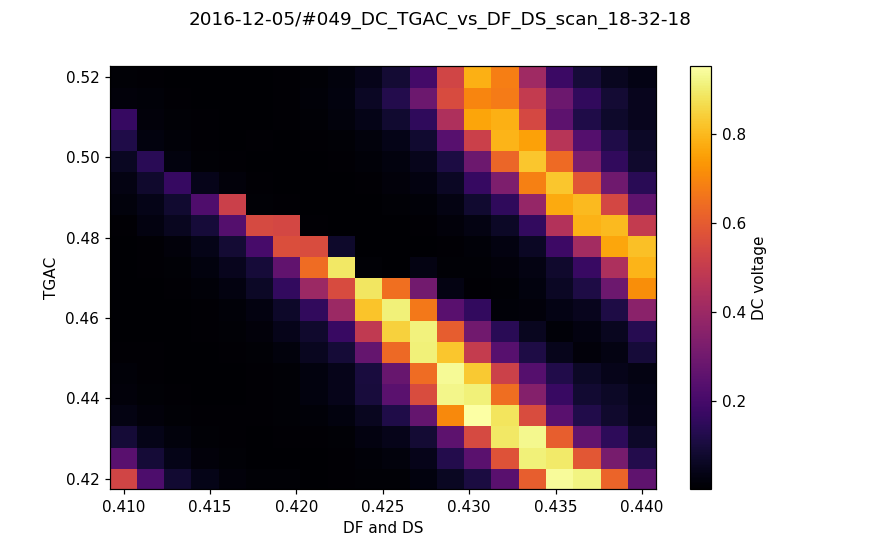

In [26]:
data = qc.load_data('2016-12-05/#049_DC_TGAC_vs_DF_DS_scan_18-32-18')
qc.MatPlot(data.DC_voltage)

Retuned with settings

DF_DS(0.42236)
TGAC(0.48218)

fidelity_empty: 0.615
fidelity_load: 0.621
fidelity_read: 0.760
up_proportion: 0.374
dark_counts: 0.087
contrast: 0.287

<IPython.core.display.Javascript object>


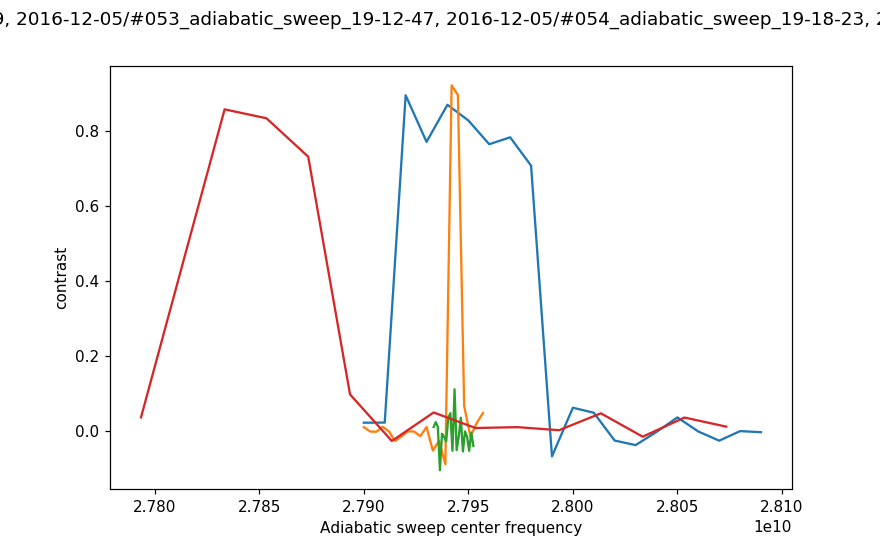

In [27]:
data = qc.load_data('2016-12-05/#052_adiabatic_sweep_19-07-59')
plot = qc.MatPlot(data.contrast)

data = qc.load_data('2016-12-05/#053_adiabatic_sweep_19-12-47')
plot.add(data.contrast)

data = qc.load_data('2016-12-05/#054_adiabatic_sweep_19-18-23')
plot.add(data.contrast)

data = qc.load_data('2016-12-05/#057_adiabatic_sweep_19-27-16')
plot.add(data.contrast)

Results looked better, but in the final scan with 10 MHz window, all of the contrast was gone.
The fourth scan was taken with a larger window, and the ESR frequency has clearly shifted

<IPython.core.display.Javascript object>


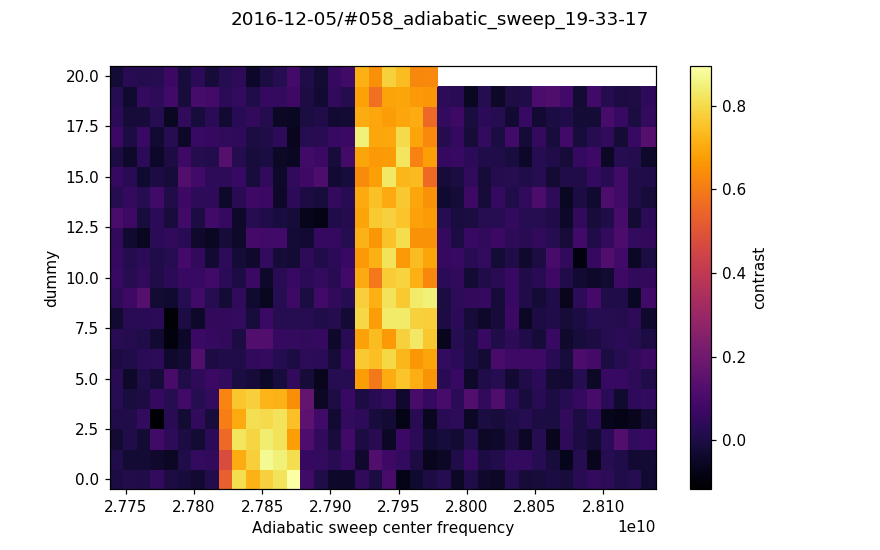

In [28]:
data = qc.load_data('2016-12-05/#058_adiabatic_sweep_19-33-17')
plot = qc.MatPlot(data.contrast)

After talking with Arne, we realized this was due to a shift of the nucleus.
Unfortunately we do not currently have a way to deal with this, so we will either have to implement NMR, or perform two successive ESR adiabatic sweeps.

In [29]:
plt.close('all')